In [1]:
import numpy as np
import pandas as pd
from sklearn import *
from scipy.stats import *
from framework.data import *
from framework.draw import *
from matplotlib import pyplot as plt

/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/sklearn/qda.py:4: DeprecationWarning: qda.QDA has been moved to discriminant_analysis.QuadraticDiscriminantAnalysis in 0.17 and will be removed in 0.19.
  "in 0.17 and will be removed in 0.19.", DeprecationWarning)


In [2]:
from importlib import reload
import framework.draw
reload(framework.draw)
from framework.draw import *

In [3]:
# The following is to check how much time the pd.read_sql command takes.
from datetime import datetime
str(datetime.now())

'2016-09-29 17:21:42.198098'

In [4]:
data = pd.read_sql('''
select
  `Provider Number`, 
  `Primary specialty`,
  `Graduation year`,
  `Total Performance Score`
from hospital_practitioners
where `Graduation year` > 1950;
''', sql)

In [5]:
data.size

4634900

In [6]:
# after running this command, I estimated that the reading takes about 7 minutes.
from datetime import datetime
str(datetime.now())

'2016-09-29 17:29:02.819410'

In [7]:
data.shape

(1158725, 4)

In [8]:
data.head(3)

Provider Number   Primary specialty  Graduation year  \
0            10001  RADIATION ONCOLOGY             2005   
1            10001     GENERAL SURGERY             1992   
2            10001          NEPHROLOGY             1970   

   Total Performance Score  
0                  36.1364  
1                  36.1364  
2                  36.1364

# 10/1/16: Ravi Rao

# This was code written on 8/25/16 which is somewhat incorrect.
# It generates a barplot of all practioner-hospital relationships 
# We want a barplot of all unique practitioners instead.
# Hence, run the code in the next cell first (ie load the data only for practitioners)

c = data.groupby('Primary specialty').count()['Graduation year']
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count < 5000)')
c[c<5000].sort_values(ascending=True).plot.barh()
draw(save='total_count<5000.png', show=True)
plt.figure(figsize=(5, 10))
plt.clf()
plt.title('Total Count Nation Wide (Count > 5000)')
c[c>5000].sort_values(ascending=True).plot.barh()
draw(save='total_count>5000.png', show=True)
print(len(c[c<5000]), len(c[c>5000]))

# 10/1/16: Ravi Rao

# This was code written on 8/25/16 which is somewhat incorrect.
# It generates a barplot of all practioner-hospital relationships 
# We want a barplot of all unique practitioners instead.
# Hence, run the code in the next cell first (ie load the data only for practitioners)

# TODO: These were fixed later (after 9/1/16 -- see another one of the notebooks, edited 9/9/16)
d = data.groupby('Primary specialty').count()['Graduation year'].sort_values()
d[(d - d.mean()) / d.std() > 1].plot.pie()
draw(title='%f' % (sum(d[(d - d.mean()) / d.std() > 1]) / sum(d)), labels=[], show=True)

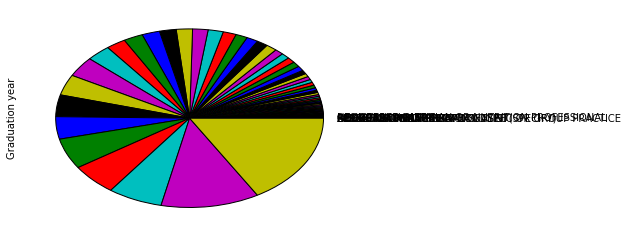

In [11]:
# TODO: These were fixed later (after 9/1/16 -- see another one of the notebooks, edited 9/9/16)
d.plot(kind='pie', labels=[l if i < 10 else '' for i, l in enumerate(d.index)])
draw(show=True)

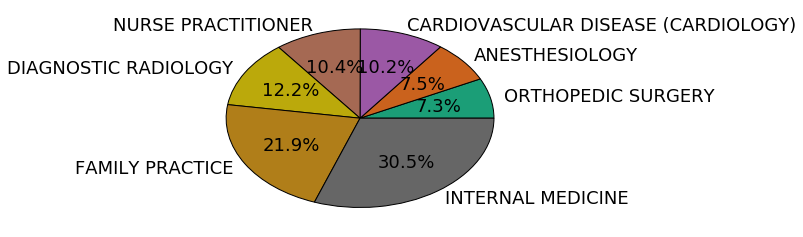

<module 'matplotlib.pyplot' from '/home/ravirao/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [328]:
# Here is the code to show the pie chart
d = data.groupby(['Primary specialty']).count()['Graduation year'].sort_values()
ax = d[(d - d.mean()) / d.std() > 1].plot.pie(autopct='%1.1f%%', colormap='Dark2')
ax.set_ylabel('')
ax.set_title('')
plt.show()
plt

In [ ]:
################## New code inserted 10/1/16, based on 2016-10-01_ravi_check_dimensions.ipynb

In [ ]:
# Select distinct pairs of (NPI, Primary specialty) from the database
data = pd.read_sql('''
select distinct
  `NPI`, 
  `Primary specialty`
from practitioners
''', sql)

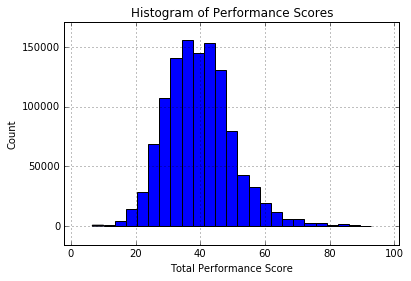

In [12]:
data['Total Performance Score'].hist(bins=25)
draw(show=True, xlabel='Total Performance Score', ylabel='Count', title='Histogram of Performance Scores')

In [13]:
######################################################################################################

In [14]:
# Now I will groupby Provider Number
provider_groups = data.groupby('Provider Number')

In [15]:
tem = provider_groups.agg(lambda grp: grp.count() < 100)

In [16]:
tem = provider_groups.count() < 100

In [17]:
tem.shape

(3089, 3)

In [18]:
# Now I will groupby Provider Number
provider_numbers_only = data['Provider Number']

In [19]:
d=data['Provider Number'].value_counts()

In [20]:
d_lt_500 = d[d<500]

In [21]:
df = data[data['Provider Number'].isin(d_lt_500.index)]

In [22]:
df[0:2]

Provider Number   Primary specialty  Graduation year  \
0            10001  RADIATION ONCOLOGY             2005   
1            10001     GENERAL SURGERY             1992   

   Total Performance Score  
0                  36.1364  
1                  36.1364

In [23]:
df.shape

(573926, 4)

In [24]:
df2 = data.loc[data['Provider Number'].isin(d_lt_500.index)]


In [25]:
df2[0:2]

Provider Number   Primary specialty  Graduation year  \
0            10001  RADIATION ONCOLOGY             2005   
1            10001     GENERAL SURGERY             1992   

   Total Performance Score  
0                  36.1364  
1                  36.1364

In [26]:
df2.shape

(573926, 4)

In [27]:
df.to_csv('hospitals_less_than_500_people.csv')

In [28]:
# Now, save hospitals less than 250 people.
d_lt_250 = d[d<250]
df3 = data.loc[data['Provider Number'].isin(d_lt_250.index)]

In [29]:
df3.to_csv('hospitals_less_than_250_people.csv')

In [30]:
tem1 = df.groupby('Primary specialty')

In [31]:
# There are 74 specialties in the database
len(tem1.size())

74

In [32]:
for specialty, ind in df.groupby('Primary specialty').groups.items():
    year = df.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df.ix[ind, 'Total Performance Score']
    plt.plot(years, scores, 'bo')
    plt.title(specialty)
    
    # uncomment the following line to show all the plots
    # plt.show()

In [33]:
# The above creates a single point everywhere. What we need is some sort of density map.


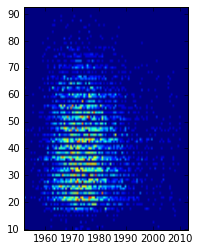

In [34]:
for specialty, ind in df.groupby('Primary specialty').groups.items():
    if specialty == 'NEUROSURGERY':
        year = df.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df.ix[ind, 'Total Performance Score']
        
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap, extent=extent)
        # plt.axis([1965, 2010, 10, 90])
        plt.axes().set_aspect('equal')
        plt.show()

In [35]:
for specialty, ind in df.groupby('Primary specialty').groups.items():
    year = df.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df.ix[ind, 'Total Performance Score']
    # plt.plot(years, scores, 'bo')
    length = len(year)
    x = year
    y = scores
            
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.clf()
    plt.imshow(heatmap, extent=extent)
    # plt.axis([1965, 2010, 10, 90])
    plt.xlabel('Graduation year')
    plt.ylabel('Total Performance Score')
    plt.axes().set_aspect('equal')
    
    # plt.title('%s, N = %d', specialty, length)
    ss = specialty + ', N = ' + str(length)
    plt.title(ss)
    
    # uncomment the following line to show all the heatmaps
    # plt.show()

In [36]:
# Note: in the following code, I determined that you need to take a
# transpose of the heatmap and put the origin at the lower left.
# See later code that uses the transpose.

for specialty, ind in df.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST']:
        year = df.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap, extent=extent)
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_500.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        
        # uncomment this line to show the plot
        # plt.show()
        
        

        
       

In [37]:
f = open('2016-08-31_results_ravi_lt_500.csv', 'w')
print('Specialty', 'Spearman Value', 'Spearman PValue', 'R', 'R^2', 'Slope', 'Mean', 'Standard Deviation', 'N', sep=',', file=f)
f.flush()

df = data[data['Provider Number'].isin(d_lt_500.index)]

for specialty, ind in df.groupby('Primary specialty').groups.items():
    year = df.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df.ix[ind, 'Total Performance Score']
    lr = linear_model.LinearRegression()
    lr.fit(years, scores)
    m = lr.coef_[0]
    r2 = lr.score(years, scores)
    r = r2**(1/2)
    s = spearmanr(years, scores)
    
    g = df.ix[ind, :].groupby('Graduation year')
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()

    print(specialty,
          '%0.3f' % (s.correlation),
          '%0.5f' % (s.pvalue),
          '%0.3f' % (r),
          '%0.3f' % (r2),
          '%0.3f' % (m),
          '%0.3f' % (scores.mean()),
          '%0.3f' % (scores.std()),
          '%d'    % (len(scores)),
          sep=',',
          file=f)
    f.flush()

f.close()

In [38]:
# Finally, do the correlation analysis on all the data.

f = open('2016-08-31_results_ravi_all.csv', 'w')
print('Specialty', 'Spearman Value', 'Spearman PValue', 'R', 'R^2', 'Slope', 'Mean', 'Standard Deviation', 'N', sep=',', file=f)
f.flush()

df = data;

for specialty, ind in df.groupby('Primary specialty').groups.items():
    year = df.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df.ix[ind, 'Total Performance Score']
    lr = linear_model.LinearRegression()
    lr.fit(years, scores)
    m = lr.coef_[0]
    r2 = lr.score(years, scores)
    r = r2**(1/2)
    s = spearmanr(years, scores)
    
    g = df.ix[ind, :].groupby('Graduation year')
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()

    print(specialty,
          '%0.3f' % (s.correlation),
          '%0.5f' % (s.pvalue),
          '%0.3f' % (r),
          '%0.3f' % (r2),
          '%0.3f' % (m),
          '%0.3f' % (scores.mean()),
          '%0.3f' % (scores.std()),
          '%d'    % (len(scores)),
          sep=',',
          file=f)
    f.flush()

f.close()

In [39]:
d = pd.read_csv('2016-08-31_results_ravi_lt_500.csv')

In [40]:
d.sort_values('Spearman Value', ascending=False)

Specialty  Spearman Value  \
71                     SPEECH LANGUAGE PATHOLOGIST           0.714   
40                            GERIATRIC PSYCHIATRY           0.390   
7                                  NEUROPSYCHIATRY           0.211   
5                        SLEEP LABORATORY/MEDICINE           0.114   
58                              ADDICTION MEDICINE           0.111   
38                                      HEMATOLOGY           0.104   
59                                     DERMATOLOGY           0.088   
16                        ANESTHESIOLOGY ASSISTANT           0.081   
13                 COLORECTAL SURGERY (PROCTOLOGY)           0.079   
31                           CLINICAL PSYCHOLOGIST           0.075   
43            PHYSICAL MEDICINE AND REHABILITATION           0.073   
70                               PULMONARY DISEASE           0.073   
12                                       OPTOMETRY           0.073   
39                              PEDIATRIC MEDICINE           0.071   
66                    CRITICAL CARE (INTENSIVISTS)           0.070   
60                          GYNECOLOGICAL ONCOLOGY           0.070   
64                                         UROLOGY           0.067   
11                                GASTROENTEROLOGY           0.060   
25                          CLINICAL SOCIAL WORKER           0.059   
15                               INTERNAL MEDICINE           0.057   
54                              ALLERGY/IMMUNOLOGY           0.055   
68                                NUCLEAR MEDICINE           0.052   
47                                GENERAL PRACTICE           0.050   
57                                 CARDIAC SURGERY           0.050   
23                              GERIATRIC MEDICINE           0.046   
9                                 PHYSICAL THERAPY           0.046   
36                           OBSTETRICS/GYNECOLOGY           0.044   
19                                       NEUROLOGY           0.044   
73                                   ENDOCRINOLOGY           0.043   
18                                THORACIC SURGERY           0.042   
..                                             ...             ...   
41              PLASTIC AND RECONSTRUCTIVE SURGERY           0.026   
46                                 FAMILY PRACTICE           0.025   
62                           MAXILLOFACIAL SURGERY           0.025   
6                   INTERVENTIONAL PAIN MANAGEMENT           0.022   
22                         CERTIFIED NURSE MIDWIFE           0.018   
52                              ORTHOPEDIC SURGERY           0.015   
61                        INTERVENTIONAL RADIOLOGY           0.015   
2                                     CHIROPRACTIC           0.014   
14                                   OPHTHALMOLOGY           0.013   
69                              EMERGENCY MEDICINE           0.012   
8                                     NEUROSURGERY           0.008   
17                            DIAGNOSTIC RADIOLOGY           0.007   
21                                 PAIN MANAGEMENT           0.005   
65                                 SPORTS MEDICINE           0.004   
53                                      NEPHROLOGY           0.003   
56                                    HAND SURGERY           0.003   
26                           PREVENTATIVE MEDICINE          -0.010   
42                              NURSE PRACTITIONER          -0.015   
55                         HOSPICE/PALLIATIVE CARE          -0.018   
35                       CARDIAC ELECTROPHYSIOLOGY          -0.019   
34               OSTEOPATHIC MANIPULATIVE MEDICINE          -0.024   
33          CERTIFIED REGISTERED NURSE ANESTHETIST          -0.028   
50                       CLINICAL NURSE SPECIALIST          -0.036   
0   REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL          -0.050   
45                     ORAL SURGERY (DENTIST ONLY)          -0.054   
24                               SURGICAL ONCOLOGY 

In [41]:
# now do analysis for even smaller hospitals
d=data['Provider Number'].value_counts()
df_lt_250 = data[data['Provider Number'].isin(d[d<250].index)]

In [42]:
# Note: in the following code, I determined that you need to take a
# transpose of the heatmap and put the origin at the lower left.
# See later code that uses the transpose.

for specialty, ind in df_lt_250.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST']:
        year = df_lt_250.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df_lt_250.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap, extent=extent)
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_250.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        
        # uncomment this line to show the plot
        # plt.show()
        

In [43]:
f = open('2016-08-31_results_ravi_lt_250.csv', 'w')
print('Specialty', 'Spearman Value', 'Spearman PValue', 'R', 'R^2', 'Slope', 'Mean', 'Standard Deviation', 'N', sep=',', file=f)
f.flush()

# df = data[data['Provider Number'].isin(d_lt_500.index)]

for specialty, ind in df_lt_250.groupby('Primary specialty').groups.items():
    year = df_lt_250.ix[ind, 'Graduation year']
    years = np.array(year)[:, np.newaxis]
    scores = df_lt_250.ix[ind, 'Total Performance Score']
    lr = linear_model.LinearRegression()
    lr.fit(years, scores)
    m = lr.coef_[0]
    r2 = lr.score(years, scores)
    r = r2**(1/2)
    s = spearmanr(year, scores)
    
    g = df_lt_250.ix[ind, :].groupby('Graduation year')
    std_score = g['Total Performance Score'].std()
    mean_score = g['Total Performance Score'].mean()

    print(specialty,
          '%0.3f' % (s.correlation),
          '%0.5f' % (s.pvalue),
          '%0.3f' % (r),
          '%0.3f' % (r2),
          '%0.3f' % (m),
          '%0.3f' % (scores.mean()),
          '%0.3f' % (scores.std()),
          '%d' % (len(scores)),
           sep=',',
          file=f)
    f.flush()

f.close()

In [44]:
d = pd.read_csv('2016-08-31_results_ravi_lt_250.csv')

In [45]:
d.sort_values('Spearman Value', ascending=False)

Specialty  Spearman Value  \
41                            GERIATRIC PSYCHIATRY           0.546   
71                     SPEECH LANGUAGE PATHOLOGIST           0.500   
0   REGISTERED DIETITIAN OR NUTRITION PROFESSIONAL           0.393   
4                        SLEEP LABORATORY/MEDICINE           0.276   
9                                 PHYSICAL THERAPY           0.234   
60                              ADDICTION MEDICINE           0.210   
25                          CLINICAL SOCIAL WORKER           0.209   
53                             PHYSICIAN ASSISTANT           0.172   
7                                  NEUROPSYCHIATRY           0.138   
32                           CLINICAL PSYCHOLOGIST           0.129   
59                                 CARDIAC SURGERY           0.114   
66                                         UROLOGY           0.111   
67                    CRITICAL CARE (INTENSIVISTS)           0.102   
44            PHYSICAL MEDICINE AND REHABILITATION           0.100   
61                                     DERMATOLOGY           0.098   
28                                VASCULAR SURGERY           0.088   
12                                       OPTOMETRY           0.081   
73                               PULMONARY DISEASE           0.080   
6                               ALLERGY/IMMUNOLOGY           0.078   
47                                THORACIC SURGERY           0.077   
15                               INTERNAL MEDICINE           0.074   
70                                   ENDOCRINOLOGY           0.074   
5                   INTERVENTIONAL PAIN MANAGEMENT           0.072   
45                        INTERVENTIONAL RADIOLOGY           0.069   
20                                  ANESTHESIOLOGY           0.069   
64                           MAXILLOFACIAL SURGERY           0.068   
18                     ORAL SURGERY (DENTIST ONLY)           0.067   
62                          GYNECOLOGICAL ONCOLOGY           0.065   
30                                MEDICAL ONCOLOGY           0.065   
31                                      PSYCHIATRY           0.065   
..                                             ...             ...   
38                                 GENERAL SURGERY           0.036   
57                         HOSPICE/PALLIATIVE CARE           0.032   
23                              GERIATRIC MEDICINE           0.028   
48                                 FAMILY PRACTICE           0.028   
10                                        PODIATRY           0.027   
17                            DIAGNOSTIC RADIOLOGY           0.024   
29          CERTIFIED REGISTERED NURSE ANESTHETIST           0.024   
14             CARDIOVASCULAR DISEASE (CARDIOLOGY)           0.023   
42              PLASTIC AND RECONSTRUCTIVE SURGERY           0.018   
56                              INFECTIOUS DISEASE           0.017   
22                         CERTIFIED NURSE MIDWIFE           0.017   
52                       CLINICAL NURSE SPECIALIST           0.008   
13                 COLORECTAL SURGERY (PROCTOLOGY)           0.007   
69                              EMERGENCY MEDICINE           0.006   
8                                     NEUROSURGERY           0.005   
51                                NUCLEAR MEDICINE          -0.003   
55                                      NEPHROLOGY          -0.004   
36                       CARDIAC ELECTROPHYSIOLOGY          -0.005   
49                                 PAIN MANAGEMENT          -0.024   
43                              NURSE PRACTITIONER          -0.027   
24                               SURGICAL ONCOLOGY          -0.041   
34                                    CHIROPRACTIC          -0.058   
72                            OCCUPATIONAL THERAPY          -0.083   
26                           PREVENTATIVE MEDICINE          -0.096   
35               OSTEOPATHIC MANIPULATIVE MEDICINE          -0.122   
50              UNDEFINED PHYSICIAN TYPE (SPECIFY) 

In [46]:
# 9/1/16: I'm checking the heatmap for nurse practitioners, hospitals < 500
d=data['Provider Number'].value_counts()

df_lt_500 = data[data['Provider Number'].isin(d[d<500].index)]

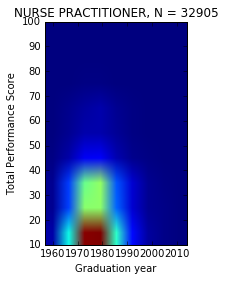

In [47]:
# Note: in the following code, I determined that you need to take a
# transpose of the heatmap and put the origin at the lower left.
# See later code that uses the transpose.


for specialty, ind in df_lt_500.groupby('Primary specialty').groups.items():
    if specialty in ['NURSE PRACTITIONER']:
        year = df_lt_500.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df_lt_500.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.linspace(min(x), max(x), 10), range(10, 101, 10)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap, extent=extent)
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_500.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        plt.show()

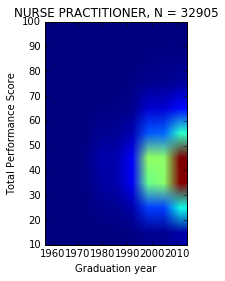

In [48]:
# Here is the corrected version of the code, with a tranpsose to show the heatmap.

for specialty, ind in df_lt_500.groupby('Primary specialty').groups.items():
    if specialty in ['NURSE PRACTITIONER']:
        year = df_lt_500.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df_lt_500.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=[np.linspace(min(x), max(x), 10), range(10, 101, 10)])
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        # heatmap.transpose(), origin='low'  The transpose and this option are IMPORTANT.
        plt.imshow(heatmap.transpose(), extent=extent, origin='low')
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_500.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        plt.show()
        

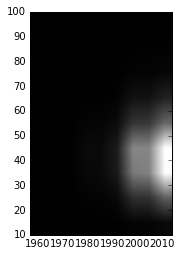

In [49]:
plt.imshow(heatmap.transpose(), extent=extent, cmap=plt.get_cmap('gray'), origin='low')
plt.show()

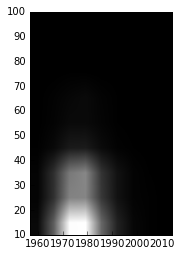

In [50]:
plt.imshow(heatmap, extent=extent, cmap=plt.get_cmap('gray'))
plt.show()

In [51]:
for specialty, ind in df_lt_250.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST', 'PHYSICAL THERAPY']:
        year = df_lt_250.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df_lt_250.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap.transpose(), extent=extent, origin='low', cmap=plt.get_cmap('gray'))
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_250.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # Uncomment these lines to save and show the figure
        # plt.savefig(figname, bbox_inches='tight')
        # plt.show()
        

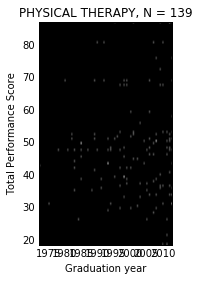

In [52]:
for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty == 'PHYSICAL THERAPY':
        year = data.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = data.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap.transpose(), extent=extent, origin='low', cmap=plt.get_cmap('gray'))
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_250.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        plt.savefig(figname, bbox_inches='tight')
        plt.show()
        break
        

In [53]:
d = data['Total Performance Score'].sort_values()
df_outer_scores = data.ix[pd.concat([d.iloc[:int(len(d) * .1)], d.iloc[int(len(d) * .9):]]).index]

In [54]:
# This shows the outer scores: the scores in the outer band of the distribution
for specialty, ind in df_outer_scores.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST', 'PHYSICAL THERAPY']:
        year = df_outer_scores.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df_outer_scores.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap.transpose(), extent=extent, origin='low', cmap=plt.get_cmap('gray'))
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Graduation year')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_250.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        
        # plt.show()
        

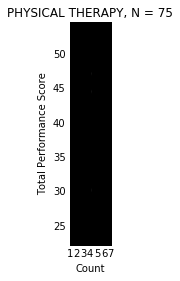

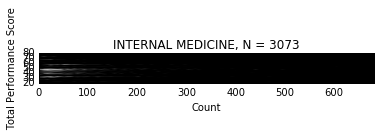

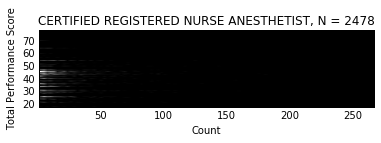

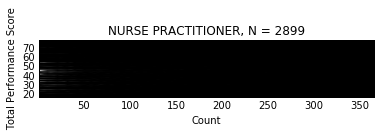

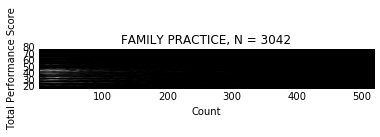

In [55]:
# This shows the counts on the x axis
for specialty, ind in data.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST', 'PHYSICAL THERAPY']:
        count = df.ix[ind, 'Provider Number'].value_counts()
        counts = np.array(count)[:, np.newaxis]
        scores = data.ix[count.index, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(count)
        x = count
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.clf()
        plt.imshow(heatmap.transpose(), extent=extent, origin='low', cmap=plt.get_cmap('gray'))
        # plt.axis([1965, 2010, 10, 90])
        plt.xlabel('Count')
        plt.ylabel('Total Performance Score')
        plt.axes().set_aspect('equal')
    
        # plt.title('%s, N = %d', specialty, length)
        ss = specialty + ', N = ' + str(length)
        plt.title(ss)
        
        figname = specialty + '_hospitals_less_than_250.png'
        # replace whitespace in the figname with underscore
        figname = figname.replace(' ', '_')  

        # plt.savefig(figname, bbox_inches='tight')
        plt.show()
        

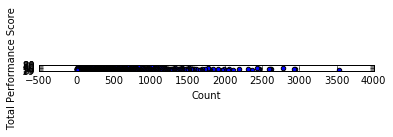

In [56]:
count = data['Provider Number'].value_counts()
scores = data.ix[count.index, 'Total Performance Score']

x = count
y = scores

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.scatter(x, y)
# plt.scatter(heatmap.transpose(), extent=extent, origin='low', cmap=plt.get_cmap('gray'))
plt.xlabel('Count')
plt.ylabel('Total Performance Score')
# plt.ylim((0,100))
plt.axes().set_aspect('equal')
plt.show()

In [57]:
# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

# http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
rcParams.update({'font.size': 18})

INTERNAL MEDICINE
CERTIFIED REGISTERED NURSE ANESTHETIST
NURSE PRACTITIONER
FAMILY PRACTICE


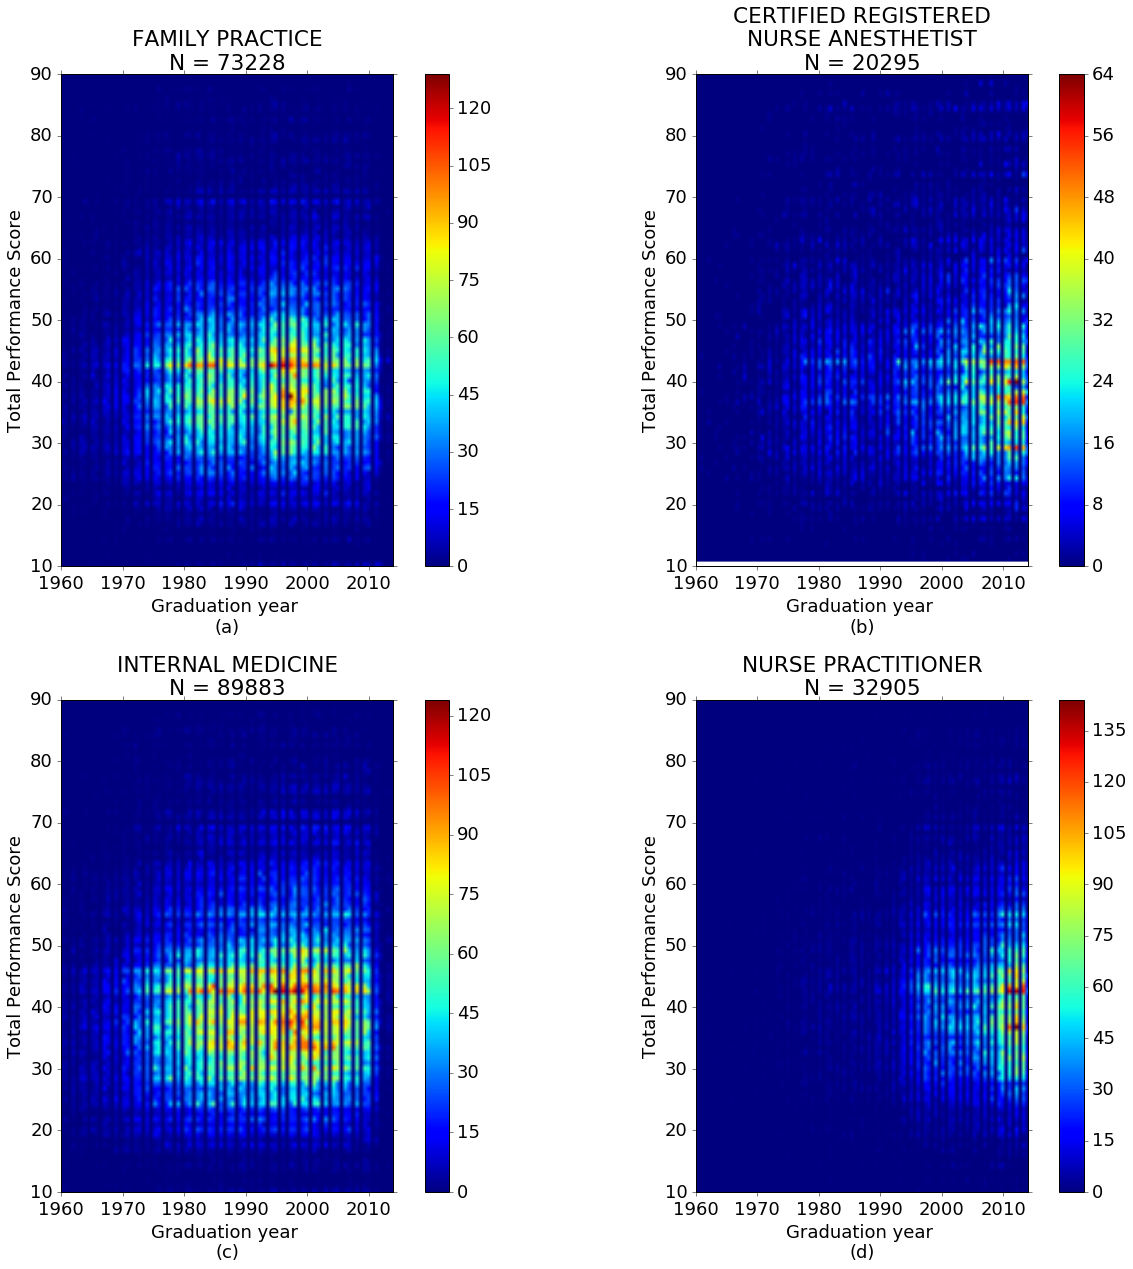

In [58]:
# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.
# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
sps=iter([223, 222, 224, 221])

# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])


plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_500.index)]

for specialty, ind in df.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST']:
        print(specialty)
        year = df.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.subplot(next(sps))
        plt.imshow(heatmap.transpose(), extent=extent, origin='low')
        #plt.plot(x,y)
        plt.axis([1960, 2014, 10, 90])
        plt.xlabel('Graduation year \n'+ next(subplot_labels))
        plt.ylabel('Total Performance Score')
        plt.colorbar()
        #plt.axes().set_aspect('equal')
    
        # The following code splits a longer specialty name into multiple lines,
        # with two words per line.
        # plt.title('%s, N = %d', specialty, length)
        s = iter(specialty.split())
        title = ''
        try:
            while True:
                title += next(s) + ' '
                title += next(s) + '\n'
        except:
            pass
        title = title.strip() + '\nN = %d' % (length)
        plt.title(title)
        #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_500.png', bbox_inches='tight', dpi=300)


plt.show()

INTERNAL MEDICINE
CERTIFIED REGISTERED NURSE ANESTHETIST
NURSE PRACTITIONER
FAMILY PRACTICE


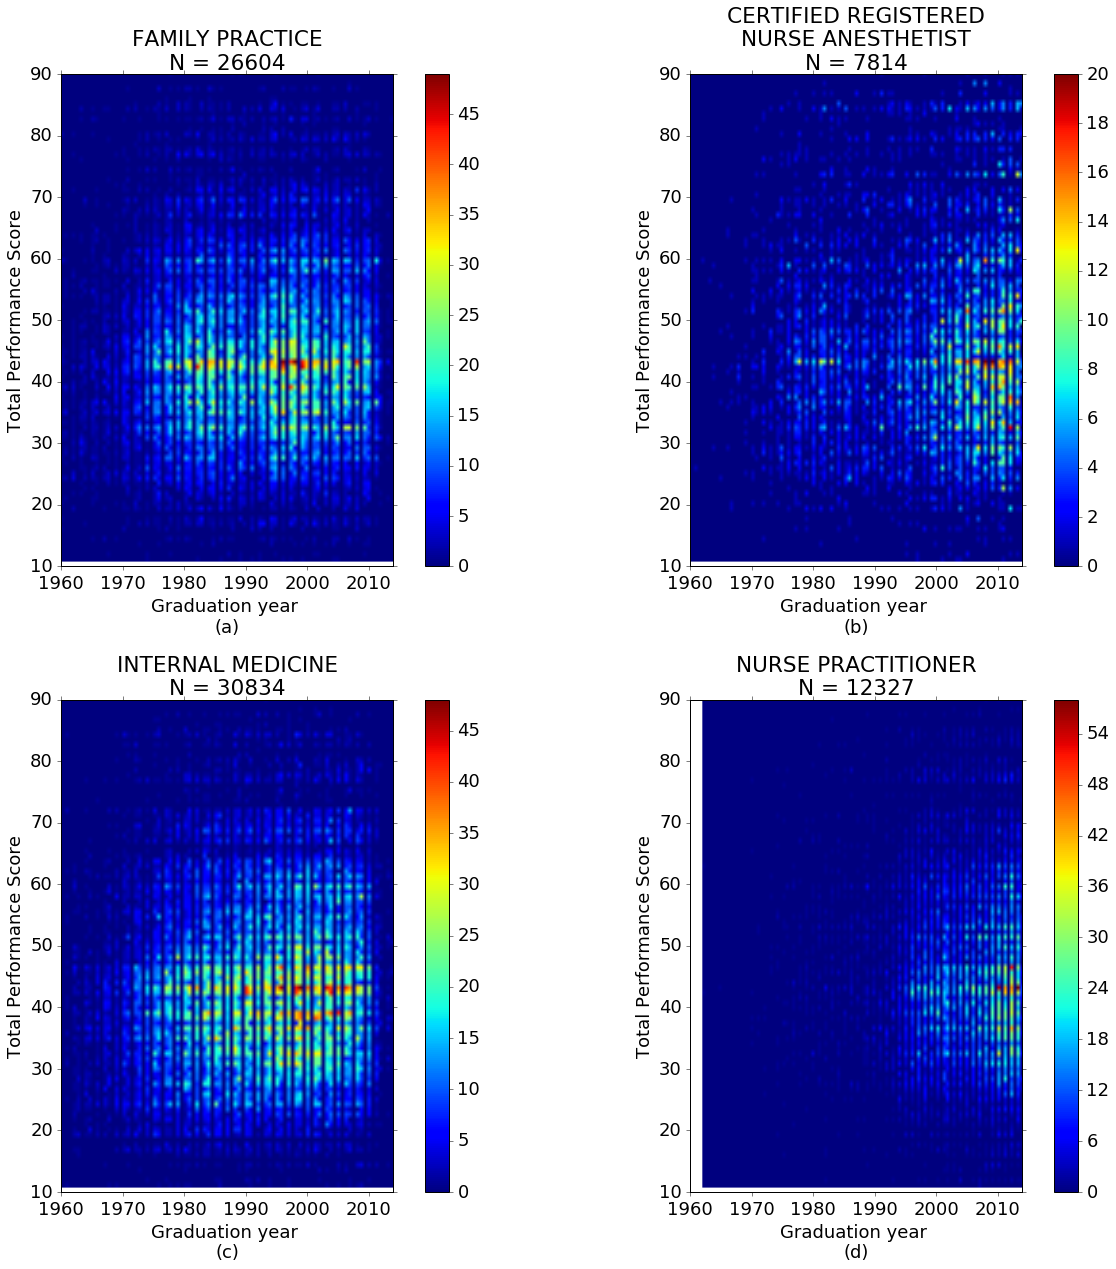

In [59]:
# Continuing the exploration above. Use hospitals with < 250 practitioners

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
sps=iter([223, 222, 224, 221])

# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])


plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_250.index)]

for specialty, ind in df.groupby('Primary specialty').groups.items():
    if specialty in ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST']:
        print(specialty)
        year = df.ix[ind, 'Graduation year']
        years = np.array(year)[:, np.newaxis]
        scores = df.ix[ind, 'Total Performance Score']
        # plt.plot(years, scores, 'bo')
        length = len(year)
        x = year
        y = scores
            
        heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

        plt.subplot(next(sps))
        plt.imshow(heatmap.transpose(), extent=extent, origin='low')
        #plt.plot(x,y)
        plt.axis([1960, 2014, 10, 90])
        plt.xlabel('Graduation year \n'+ next(subplot_labels))
        plt.ylabel('Total Performance Score')
        plt.colorbar()
        #plt.axes().set_aspect('equal')
    
        # The following code splits a longer specialty name into multiple lines,
        # with two words per line.
        
        # plt.title('%s, N = %d', specialty, length)
        s = iter(specialty.split())
        title = ''
        try:
            while True:
                title += next(s) + ' '
                title += next(s) + '\n'
        except:
            pass
        title = title.strip() + '\nN = %d' % (length)
        plt.title(title)
        #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_250.png', bbox_inches='tight', dpi=300)


plt.show()

INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


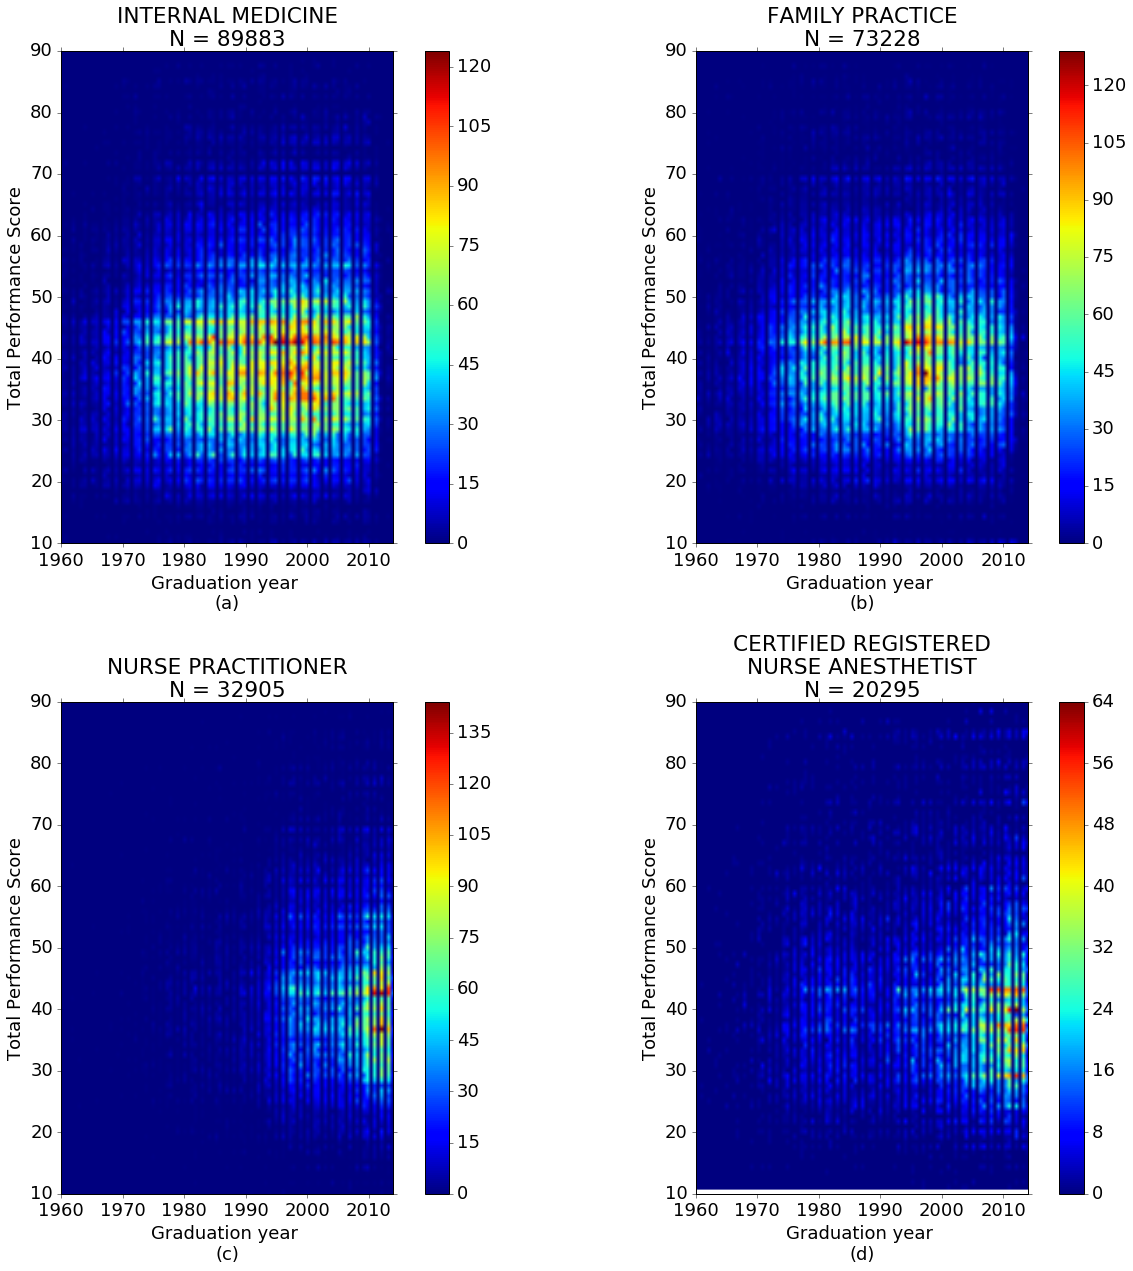

In [60]:
# 9/16/16

# This is for hospitals with less than 500 practitioners


# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_500.index)]

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            plt.colorbar()
            #plt.axes().set_aspect('equal')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_500.png', bbox_inches='tight', dpi=300)


plt.show()


INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


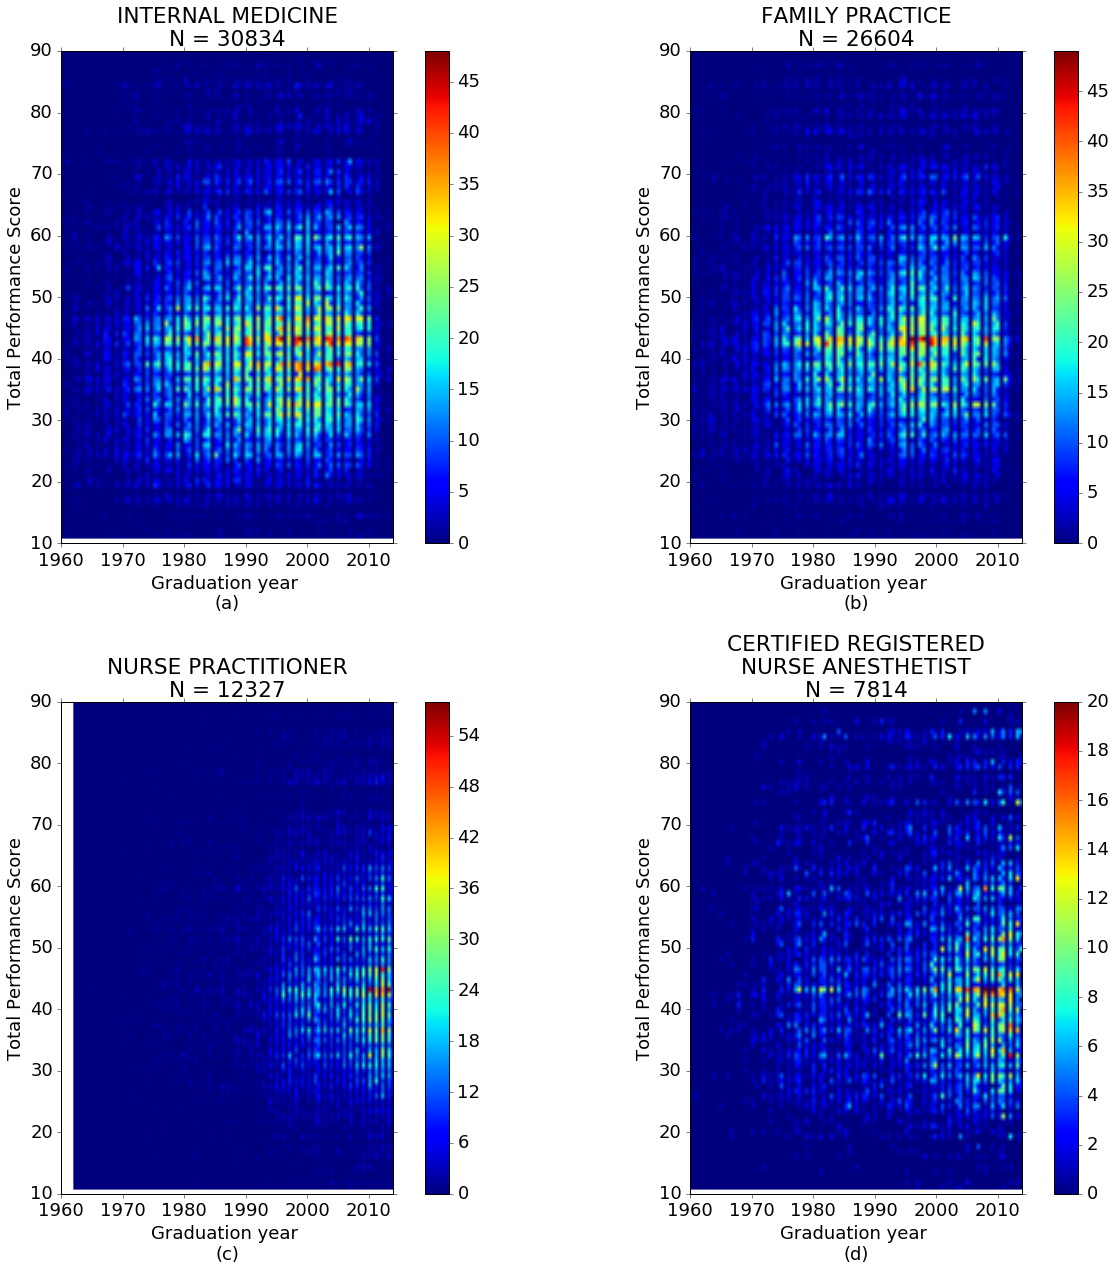

In [61]:
# 9/16/16

# This is for hospitals with less than 250 practitioners

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_250.index)]

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            plt.colorbar()
            #plt.axes().set_aspect('equal')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_250.png', bbox_inches='tight', dpi=300)


plt.show()


INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


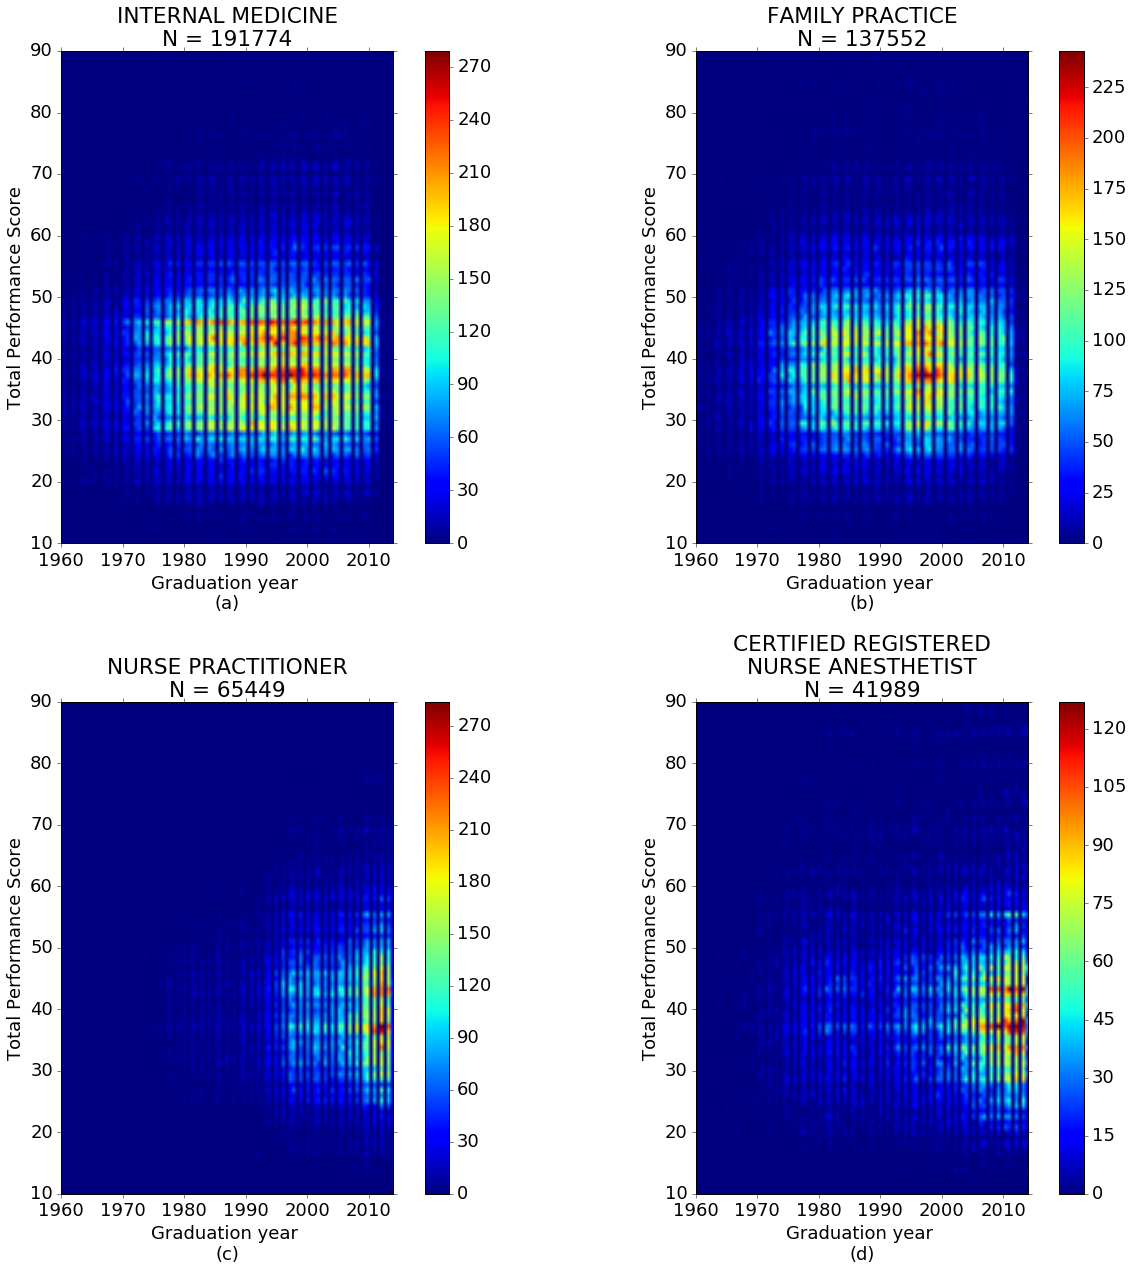

In [62]:
# 9/16/16

# This is for all hospitals

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data;

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            plt.colorbar()
            #plt.axes().set_aspect('equal')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


NURSE PRACTITIONER


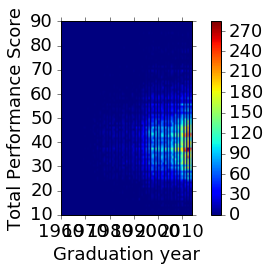

In [63]:
# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year')
            plt.ylabel('Total Performance Score')
            plt.colorbar()
 
plt.tight_layout()
# plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


In [64]:
extent

[1957.0, 2014.0, 6.5999999999999996, 92.857100000000003]

In [65]:
xedges

array([ 1957.  ,  1957.57,  1958.14,  1958.71,  1959.28,  1959.85,
        1960.42,  1960.99,  1961.56,  1962.13,  1962.7 ,  1963.27,
        1963.84,  1964.41,  1964.98,  1965.55,  1966.12,  1966.69,
        1967.26,  1967.83,  1968.4 ,  1968.97,  1969.54,  1970.11,
        1970.68,  1971.25,  1971.82,  1972.39,  1972.96,  1973.53,
        1974.1 ,  1974.67,  1975.24,  1975.81,  1976.38,  1976.95,
        1977.52,  1978.09,  1978.66,  1979.23,  1979.8 ,  1980.37,
        1980.94,  1981.51,  1982.08,  1982.65,  1983.22,  1983.79,
        1984.36,  1984.93,  1985.5 ,  1986.07,  1986.64,  1987.21,
        1987.78,  1988.35,  1988.92,  1989.49,  1990.06,  1990.63,
        1991.2 ,  1991.77,  1992.34,  1992.91,  1993.48,  1994.05,
        1994.62,  1995.19,  1995.76,  1996.33,  1996.9 ,  1997.47,
        1998.04,  1998.61,  1999.18,  1999.75,  2000.32,  2000.89,
        2001.46,  2002.03,  2002.6 ,  2003.17,  2003.74,  2004.31,
        2004.88,  2005.45,  2006.02,  2006.59,  2007.16,  2007

In [66]:
heatmap.shape

(100, 100)

In [67]:
heatmap[:,99]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  4.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,
        1.,  1.,  0.,  2.,  0.,  1.,  0.,  2.,  0.])

In [68]:
heatmap[99,:]

array([  0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         1.,   1.,   2.,   1.,   1.,   1.,   4.,   2.,   1.,   6.,  16.,
        14.,  13.,   8.,  17.,  31.,  16.,  21.,  32.,  31.,  37.,  35.,
        36.,  43.,  40.,  33.,  33.,  32.,  25.,  19.,  48.,  34.,  49.,
        38.,  29.,  18.,  19.,  18.,  21.,  12.,  15.,   6.,  19.,   5.,
        11.,  12.,   3.,   2.,  12.,   7.,   5.,   3.,   4.,   3.,   3.,
         3.,   1.,   2.,   2.,   2.,   2.,   3.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
         0.])

In [69]:
df_heatmap = pd.DataFrame(heatmap)

In [70]:
df_heatmap

0    1    2    3    4    5    6    7    8    9  ...    90   91   92   93  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...  ...   
70  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  1.0 ...   2.0  0.0  0.0  0.0   
71  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  1.0  2.0 ...   1.0  0.0  0.0  1.0   
72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
73  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
75  0.0  0.0  0.0  0.0  1.0  0.0  2.0  0.0  1.0  2.0 ...   1.0  0.0  0.0  0.0   
76  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
77  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0 ...   3.0  0.0  0.0  1.0   
78  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  4.0  4.0 ...   0.0  0.0  0.0  0.0   
79  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
80  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  3.0  1.0 ...   2.0  0.0  0.0  0.0   
81  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
82  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  3.0  0.0 ...   3.0  1.0  0.0  0.0   
83  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
84  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   3.0  0.0  0.0  1.0   
85  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  3.0  0.0 ...   4.0  1.0  0.0  1.0   
86  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
87  0.0  0.0  0.0  0.0  2.0  0.0  3.

In [71]:
df_heatmap_transpose = pd.DataFrame(heatmap.transpose())

In [72]:
df_heatmap_transpose

0    1    2    3    4    5    6    7    8    9   ...    90     91     92  \
0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    1.0   
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    1.0   
7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    3.0    7.0   
9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    4.0    7.0   
10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    3.0    2.0   
11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   13.0   17.0   
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    4.0    6.0   
13  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   12.0   20.0   
14  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    9.0   11.0   
15  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   10.0   15.0   
16  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   13.0   17.0   
17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   23.0   14.0   
18  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   17.0   13.0   
19  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   18.0   19.0   
20  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   44.0   36.0   
21  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   62.0   76.0   
22  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   55.0   63.0   
23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   69.0   94.0   
24  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   52.0   60.0   
25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   81.0  116.0   
26  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   88.0  118.0   
27  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   89.0   89.0   
28  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0  131.0  154.0   
29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   99.0  148.0   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...    ...    ...   
70  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    2.0    2.0   
71  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    7.0    3.0   
72  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   12.0   20.0   
73  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
74  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    6.0    6.0   
75  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    7.0   
76  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    1.0   
77  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    0.0   
78  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    4.0   
79  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    3.0    2.0   
80  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    0.0   
81  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    2.0    7.0   
82  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    3.0    4.0   
83  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    2.0    1.0   
84  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    1.0    2.0   
85  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    3.0   
86  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0    0.0    0.0   
87  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [73]:
yedges

array([  6.6     ,   7.462571,   8.325142,   9.187713,  10.050284,
        10.912855,  11.775426,  12.637997,  13.500568,  14.363139,
        15.22571 ,  16.088281,  16.950852,  17.813423,  18.675994,
        19.538565,  20.401136,  21.263707,  22.126278,  22.988849,
        23.85142 ,  24.713991,  25.576562,  26.439133,  27.301704,
        28.164275,  29.026846,  29.889417,  30.751988,  31.614559,
        32.47713 ,  33.339701,  34.202272,  35.064843,  35.927414,
        36.789985,  37.652556,  38.515127,  39.377698,  40.240269,
        41.10284 ,  41.965411,  42.827982,  43.690553,  44.553124,
        45.415695,  46.278266,  47.140837,  48.003408,  48.865979,
        49.72855 ,  50.591121,  51.453692,  52.316263,  53.178834,
        54.041405,  54.903976,  55.766547,  56.629118,  57.491689,
        58.35426 ,  59.216831,  60.079402,  60.941973,  61.804544,
        62.667115,  63.529686,  64.392257,  65.254828,  66.117399,
        66.97997 ,  67.842541,  68.705112,  69.567683,  70.430

In [74]:
new_x_axis = yedges
new_y_axis = heatmap.transpose()[:, 99]

In [75]:
new_x_axis.shape

(101,)

In [76]:
new_y_axis.shape

(100,)

In [77]:
# Note that the shapes are different.
# So if you try to do this: 
# plt.plot(new_x_axis, new_y_axis)
# you get an error: ValueError: x and y must have same first dimension

In [78]:
# The solution is to take only 100 values for the x-axis.
# We have bin edges for the current xaxis-points. We can use bin centers, or just remove one of the bin edges.
# Let us remove the point with value equal to 6.6
new_x_axis = new_x_axis[1:]
new_x_axis.shape


(100,)

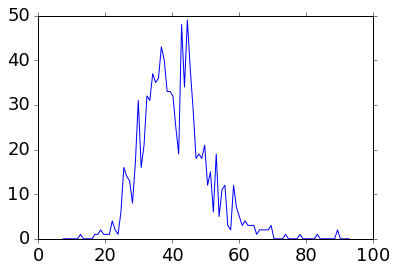

In [79]:
plt.plot(new_x_axis, new_y_axis)
plt.show()

In [80]:
# OK, I need to be careful about the order of the points: is the curve reversed, ie is it the following:
new_y_axis_list = new_y_axis.tolist()


In [81]:
new_y_axis_list.reverse()


In [82]:
# As my analysis later will show, we do not need to do this reverse.
# Besides, the mean shifts to around 60, which is wrong.

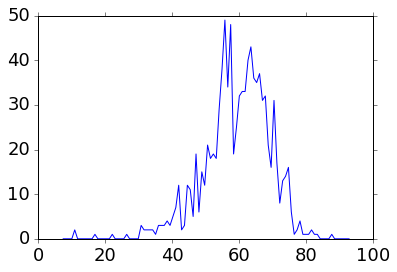

In [83]:
new_y_axis = new_y_axis_list
plt.plot(new_x_axis, new_y_axis_list)
plt.show()

NURSE PRACTITIONER


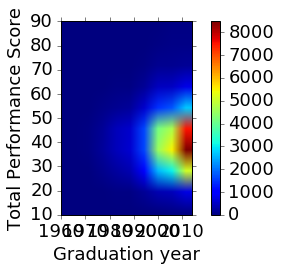

In [84]:
# The best way to check is to use a smaller heatmap, say size 10x10 and check entries manually.
# That is, use 10 bins

# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year')
            plt.ylabel('Total Performance Score')
            plt.colorbar()
 
plt.tight_layout()
# plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


In [85]:
df_heatmap = pd.DataFrame(heatmap)
df_heatmap

0      1       2       3       4       5      6      7     8     9
0   0.0    0.0     0.0     2.0     2.0     1.0    1.0    0.0   0.0   0.0
1   0.0    3.0     7.0     6.0     5.0     1.0    0.0    1.0   0.0   0.0
2   0.0    4.0    31.0    47.0    53.0    16.0    4.0    1.0   2.0   0.0
3   0.0   11.0   110.0   207.0   192.0    69.0   14.0   11.0   2.0   0.0
4   7.0   39.0   251.0   449.0   440.0   147.0   44.0   12.0   9.0   1.0
5   4.0   46.0   388.0   614.0   591.0   224.0   56.0   14.0   9.0   1.0
6  14.0  172.0   939.0  1629.0  1639.0   585.0  170.0   46.0  22.0  16.0
7  31.0  392.0  2609.0  4550.0  4178.0  1469.0  478.0  134.0  57.0  22.0
8  38.0  458.0  3087.0  5526.0  4726.0  1761.0  529.0  156.0  73.0  38.0
9  51.0  757.0  5121.0  8473.0  7520.0  2744.0  772.0  194.0  90.0  34.0

In [86]:
xedges

array([ 1957. ,  1962.7,  1968.4,  1974.1,  1979.8,  1985.5,  1991.2,
        1996.9,  2002.6,  2008.3,  2014. ])

In [87]:
yedges

array([  6.6    ,  15.22571,  23.85142,  32.47713,  41.10284,  49.72855,
        58.35426,  66.97997,  75.60568,  84.23139,  92.8571 ])

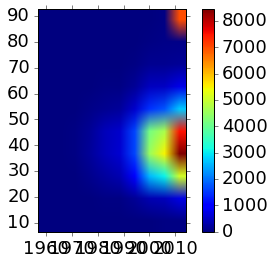

In [88]:
heatmap2 = heatmap.copy()

# suppose we put a high value at a corner.
heatmap2[9,9] = 7000
plt.imshow(heatmap2.transpose(), extent=extent, origin='low')
plt.colorbar()
plt.show()
#plt.plot(x,y)

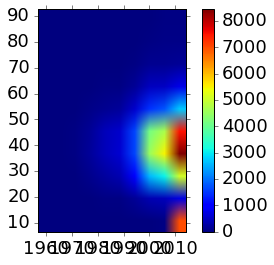

In [89]:
heatmap2 = heatmap.copy()

# suppose we put a high value at a corner.
heatmap2[9,0] = 7000
plt.imshow(heatmap2.transpose(), extent=extent, origin='low')
plt.colorbar()
plt.show()
#plt.plot(x,y)

In [90]:
# In order to plot years precisely, I need to use my own bins.
my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
my_bins_1_years_x_edges


array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])

In [91]:
# use 100 bins here.
my_bins_y_edges = np.linspace(min(y), max(y), 100)
my_bins_y_edges

array([  6.6       ,   7.47128384,   8.34256768,   9.21385152,
        10.08513535,  10.95641919,  11.82770303,  12.69898687,
        13.57027071,  14.44155455,  15.31283838,  16.18412222,
        17.05540606,  17.9266899 ,  18.79797374,  19.66925758,
        20.54054141,  21.41182525,  22.28310909,  23.15439293,
        24.02567677,  24.89696061,  25.76824444,  26.63952828,
        27.51081212,  28.38209596,  29.2533798 ,  30.12466364,
        30.99594747,  31.86723131,  32.73851515,  33.60979899,
        34.48108283,  35.35236667,  36.22365051,  37.09493434,
        37.96621818,  38.83750202,  39.70878586,  40.5800697 ,
        41.45135354,  42.32263737,  43.19392121,  44.06520505,
        44.93648889,  45.80777273,  46.67905657,  47.5503404 ,
        48.42162424,  49.29290808,  50.16419192,  51.03547576,
        51.9067596 ,  52.77804343,  53.64932727,  54.52061111,
        55.39189495,  56.26317879,  57.13446263,  58.00574646,
        58.8770303 ,  59.74831414,  60.61959798,  61.49

NURSE PRACTITIONER


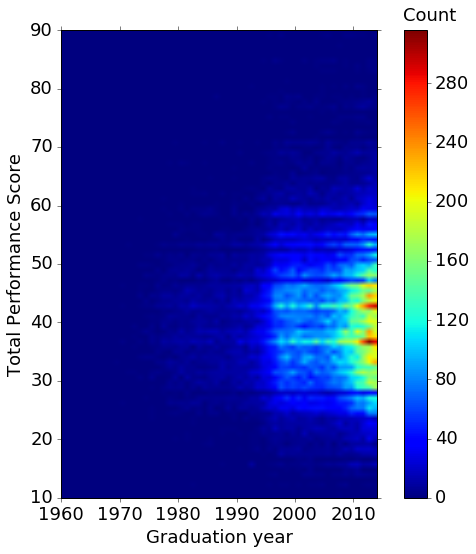

In [316]:
# Regenerate heatmap with 100 bins

# also use specific bin edges.
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];


plt.clf()
plt.figure(figsize=(8,8))


# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year')
            plt.ylabel('Total Performance Score')
            
            # http://stackoverflow.com/questions/15908371/matplotlib-colorbars-and-its-text-labels
            
            cbar = plt.colorbar()
            # cbar.ax.set_yticklabels(['0','1','2','>3'])
            # cbar.set_label('Count')
            # http://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars
            cbar.set_label('Count', labelpad=-40, y=1.05, rotation=0)

 
plt.tight_layout()
# plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


In [319]:
year.median()

2006.0

In [126]:
from mpl_toolkits import mplot3d

NURSE PRACTITIONER
(55,) (100,) (54, 99)
(99, 54) (99, 54) (99, 54)


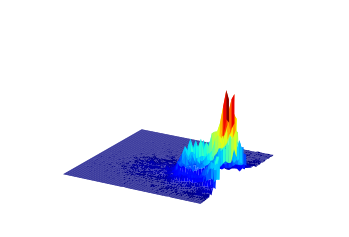

In [315]:
# Regenerate heatmap with 100 bins

# also use specific bin edges.
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];


plt.clf()
plt.figure(figsize=(18,18))


# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            print(my_bins_1_years_x_edges.shape, my_bins_y_edges.shape, heatmap.shape)
            X_new, Y_new = np.meshgrid(my_bins_1_years_x_edges[:-1], my_bins_y_edges[:-1])
            Z_new = heatmap.transpose().reshape(X_new.shape)
            #X_new, Y_new, Z_new = [np.array(list(it.chain.from_iterable(l))) for l in [*np.meshgrid(my_bins_1_years_x_edges[:-1], my_bins_y_edges[:-1]), heatmap.transpose().tolist()]]
            print(X_new.shape, Y_new.shape, Z_new.shape)
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.grid(True)
            #ax = mplot3d.Axes3D()cmap
            surf = ax.plot_surface(X_new, Y_new, Z_new, cmap=jet, rstride=1, cstride=1, linewidth=0, antialiased=True)
            #plt.plot(x,y)
            #plt.axis([1960, 2014, min(y), max(y)])
            # plt.xlabel('Graduation Year')
            plt.xlabel('Year')
            # plt.ylabel('Total Performance Score')
            plt.ylabel('Score')
            
            # Without the following, you had 7 xticks at
            # [1960, 1970, .. 2010]
            # Use the following instead:
            # plt.yticks(['1960', '', '', '', '', '2000', ''])
            # The above didnt work.
            
            #plt.tick_params(axis='x', which='both', top='off', bottom='off')
            #plt.tick_params(axis='y', which='both', top='off', bottom='off')
            # ax = plt.gca(projection='3d') 
            # ax._axis3don = False
            ax.set_axis_off()
            # ax.set_axis_off('x')
            #plt.colorbar()
            
            # http://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars
            cbar = fig.colorbar(surf, shrink=0.5, aspect=5)
            
            # Without the following command, there are 10 tick labels, at
            # [0, 30, 60, 90, 120, 150, 180, 210, 240, 270]
            # use labels as: ['0', 30, 60, 90, 120, 150, 180, 210, 240, 270]
            cbar.ax.set_yticklabels(['0', '', '', '', 120, '', '', '', '', 270])
            # cbar.ax.set_title('Count')
            cbar.set_label('Count', labelpad=-40, y=1.25, rotation=0)

           
#plt.tight_layout()
# plt.savefig('3d_plot_with_colorbar.png', bbox_inches='tight', dpi=300)
plt.savefig('3d_plot_without_colorbar.png', bbox_inches='tight', dpi=300)


plt.show()


(14400,)
(120, 120)
(120, 120)


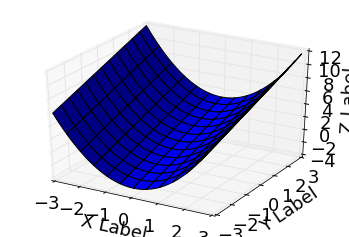

In [213]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

def fun(x, y):
  return x**2 + y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-3.0, 3.0, 0.05)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])

print(zs.shape)
Z = zs.reshape(X.shape)
print(Z.shape)
print(X.shape)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [200]:
from matplotlib.cm import coolwarm

In [204]:
Z_new

array([ 0.,  0.,  0., ...,  2.,  1.,  2.])

array([[ 0.        ,  0.        ,  0.51782531,  1.        ],
       [ 0.        ,  0.        ,  0.53565062,  1.        ],
       [ 0.        ,  0.        ,  0.55347594,  1.        ]])

In [93]:
# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

# http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
rcParams.update({'font.size': 18})

In [94]:
# I will first re-generate the plots I did earlier. 
# Skip the next few re-done plots to continue the flow of analysis.

INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


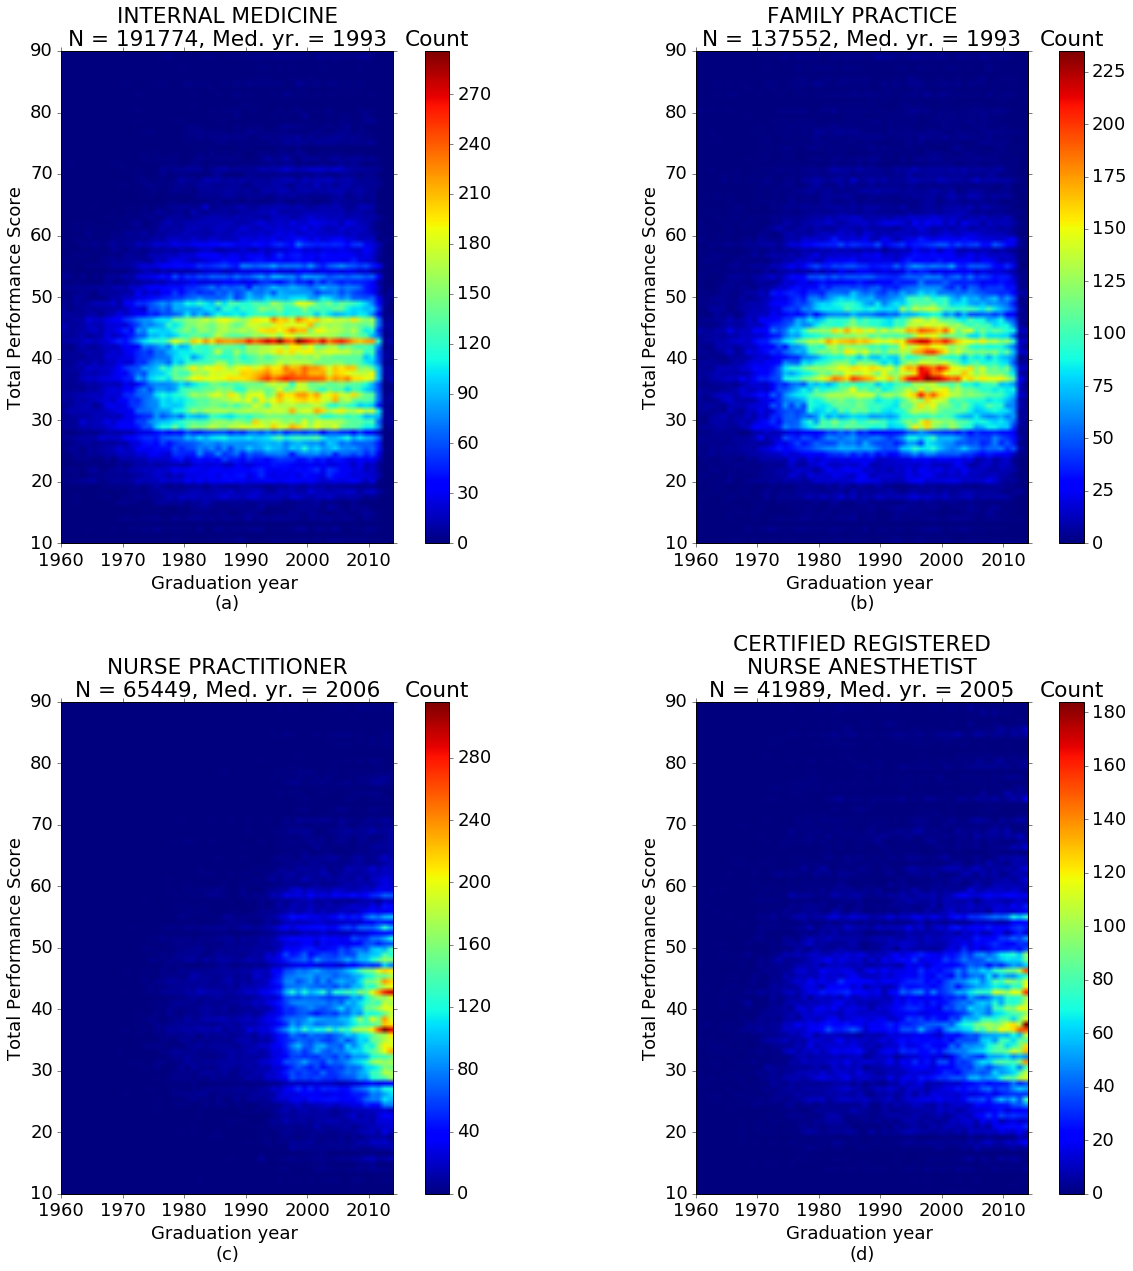

In [322]:
# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for all hospitals

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data;

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            
            # plt.colorbar()
            #plt.axes().set_aspect('equal')
            
            # Added 9/30/16, Ravi Rao
            cbar = plt.colorbar()
            # cbar.ax.set_yticklabels(['0','1','2','>3'])
            # cbar.set_label('Count')
            # http://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars
            # cbar.set_label('Count', labelpad=-40, y=1.05, rotation=0)
            cbar.ax.set_title('Count')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d, Med. yr. = %d' % (length, year.median())
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()

INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


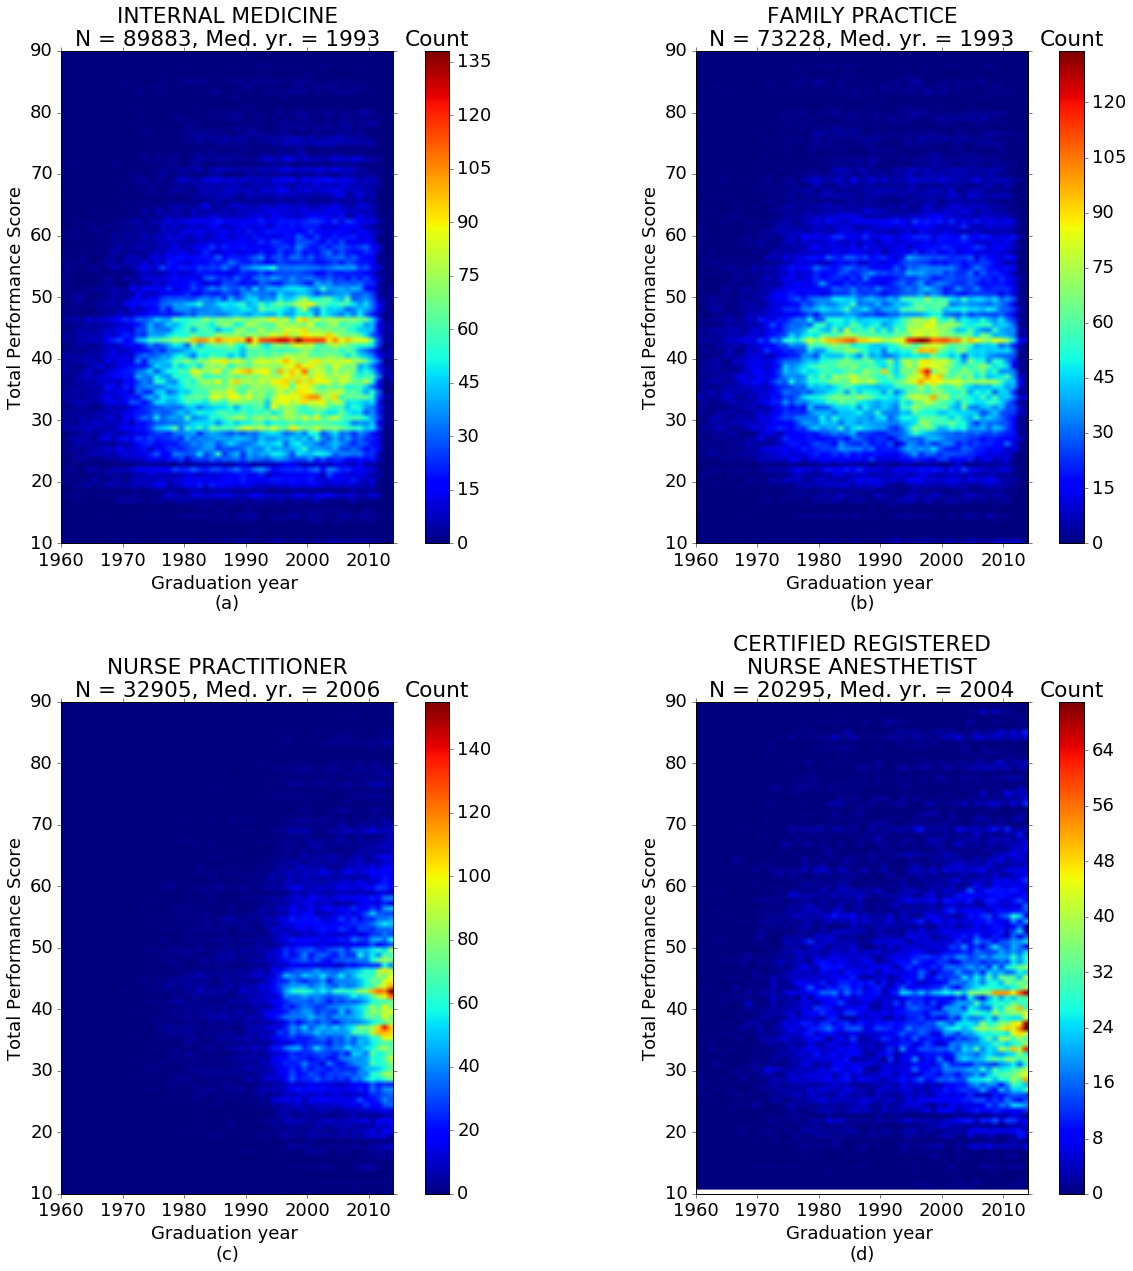

In [323]:
# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for hospitals less than 500 practitioners

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_500.index)]

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            
            # plt.colorbar()
            #plt.axes().set_aspect('equal')
            # Added 9/30/16, Ravi Rao
            cbar = plt.colorbar()
            # cbar.ax.set_yticklabels(['0','1','2','>3'])
            # cbar.set_label('Count')
            # http://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars
            # cbar.set_label('Count', labelpad=-40, y=1.05, rotation=0)
            cbar.ax.set_title('Count')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d, Med. yr. = %d' % (length, year.median())
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_500.png', bbox_inches='tight', dpi=300)



plt.show()

INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


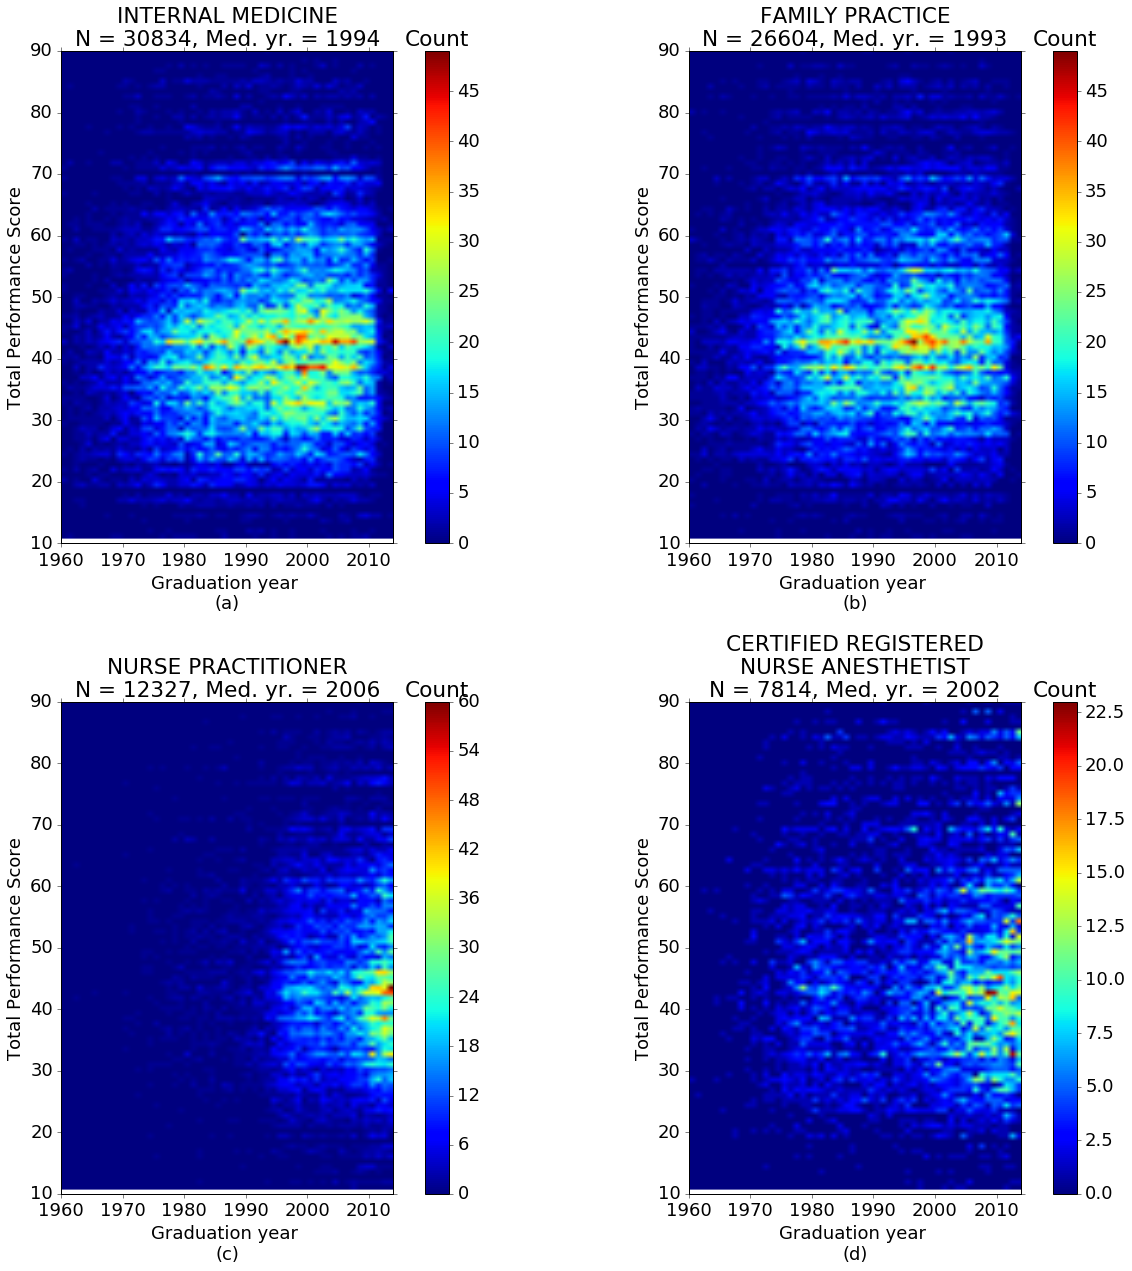

In [324]:
# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for hospitals less than 250 practitioners

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data[data['Provider Number'].isin(d_lt_250.index)]

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year \n'+ next(subplot_labels))
            plt.ylabel('Total Performance Score')
            
            # plt.colorbar()
            #plt.axes().set_aspect('equal')
            
            # Added 9/30/16, Ravi Rao
            cbar = plt.colorbar()
            # cbar.ax.set_yticklabels(['0','1','2','>3'])
            # cbar.set_label('Count')
            # http://stackoverflow.com/questions/33737427/top-label-for-matplotlib-colorbars
            # cbar.set_label('Count', labelpad=-40, y=1.05, rotation=0)
            cbar.ax.set_title('Count')

            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d, Med. yr. = %d' % (length, year.median())
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('specialties_for_hospitals_less_than_250.png', bbox_inches='tight', dpi=300)



plt.show()

NURSE PRACTITIONER


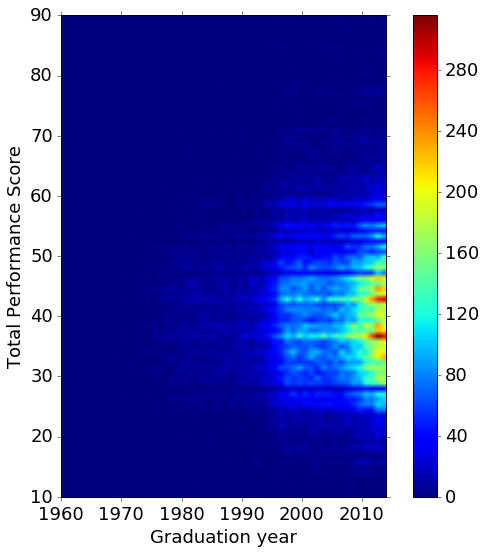

In [98]:
# Regenerate heatmap with 100 bins only for nurse practitioner

# also use specific bin edges.
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];


plt.clf()
plt.figure(figsize=(8,8))


# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year')
            plt.ylabel('Total Performance Score')
            plt.colorbar()
 
plt.tight_layout()
# plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


In [99]:
heatmap.shape

(54, 99)

In [100]:
# So it looks like I have 54 possible years.
# and 99 bins going from min rating to max rating.

In [101]:
yedges

array([  6.6       ,   7.47128384,   8.34256768,   9.21385152,
        10.08513535,  10.95641919,  11.82770303,  12.69898687,
        13.57027071,  14.44155455,  15.31283838,  16.18412222,
        17.05540606,  17.9266899 ,  18.79797374,  19.66925758,
        20.54054141,  21.41182525,  22.28310909,  23.15439293,
        24.02567677,  24.89696061,  25.76824444,  26.63952828,
        27.51081212,  28.38209596,  29.2533798 ,  30.12466364,
        30.99594747,  31.86723131,  32.73851515,  33.60979899,
        34.48108283,  35.35236667,  36.22365051,  37.09493434,
        37.96621818,  38.83750202,  39.70878586,  40.5800697 ,
        41.45135354,  42.32263737,  43.19392121,  44.06520505,
        44.93648889,  45.80777273,  46.67905657,  47.5503404 ,
        48.42162424,  49.29290808,  50.16419192,  51.03547576,
        51.9067596 ,  52.77804343,  53.64932727,  54.52061111,
        55.39189495,  56.26317879,  57.13446263,  58.00574646,
        58.8770303 ,  59.74831414,  60.61959798,  61.49

In [102]:
xedges

array([ 1960.,  1961.,  1962.,  1963.,  1964.,  1965.,  1966.,  1967.,
        1968.,  1969.,  1970.,  1971.,  1972.,  1973.,  1974.,  1975.,
        1976.,  1977.,  1978.,  1979.,  1980.,  1981.,  1982.,  1983.,
        1984.,  1985.,  1986.,  1987.,  1988.,  1989.,  1990.,  1991.,
        1992.,  1993.,  1994.,  1995.,  1996.,  1997.,  1998.,  1999.,
        2000.,  2001.,  2002.,  2003.,  2004.,  2005.,  2006.,  2007.,
        2008.,  2009.,  2010.,  2011.,  2012.,  2013.,  2014.])

In [103]:
xedges[54]

2014.0

In [104]:
heatmap.transpose().shape

(99, 54)

In [105]:
heatmap.shape

(54, 99)

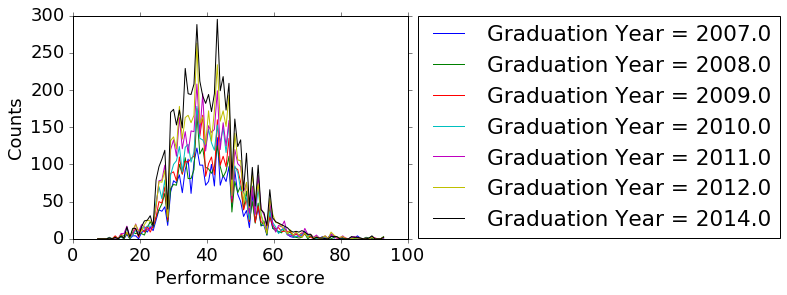

In [106]:
# Plot multiple curves for different graduation years.
for col_number in [47, 48, 49, 50, 51, 52, 54]:
    new_x_axis = yedges
    new_x_axis = new_x_axis[1:]
    
    # Note: use col_number-1 here:
    # heatmap.transpose().shape is 99x54.
    # We can have xedges[54] == 2014 (which is the last edge we want to show).
    # But this corresponds to heatmap.transpose()[:, 53]
    new_y_axis = heatmap.transpose()[:, col_number - 1]
    this_label = 'Graduation Year = ' + str(xedges[col_number])
    plt.plot(new_x_axis, new_y_axis, label=this_label)
    plt.xlabel('Performance score')
    plt.ylabel('Counts')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
    

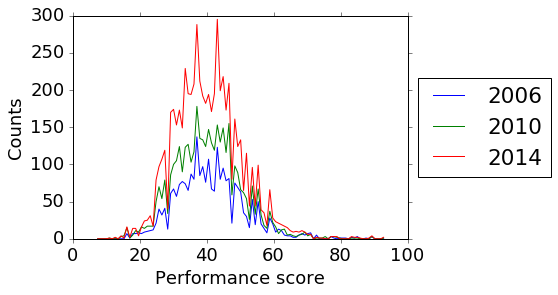

In [107]:
# There are too many in the plot above. So use a fewer number:

# Plot multiple curves for different graduation years.
for col_number in [46, 50,  54]:
    new_x_axis = yedges
    new_x_axis = new_x_axis[1:]
    
    # Note: use col_number-1 here:
    # heatmap.transpose().shape is 99x54.
    # We can have xedges[54] == 2014 (which is the last edge we want to show).
    # But this corresponds to heatmap.transpose()[:, 53]
    new_y_axis = heatmap.transpose()[:, col_number - 1]
    # this_label = 'Graduation Year = ' + str(int(xedges[col_number]))
    this_label = str(int(xedges[col_number]))
    plt.plot(new_x_axis, new_y_axis, label=this_label)
    plt.xlabel('Performance score')
    plt.ylabel('Counts')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
    

INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


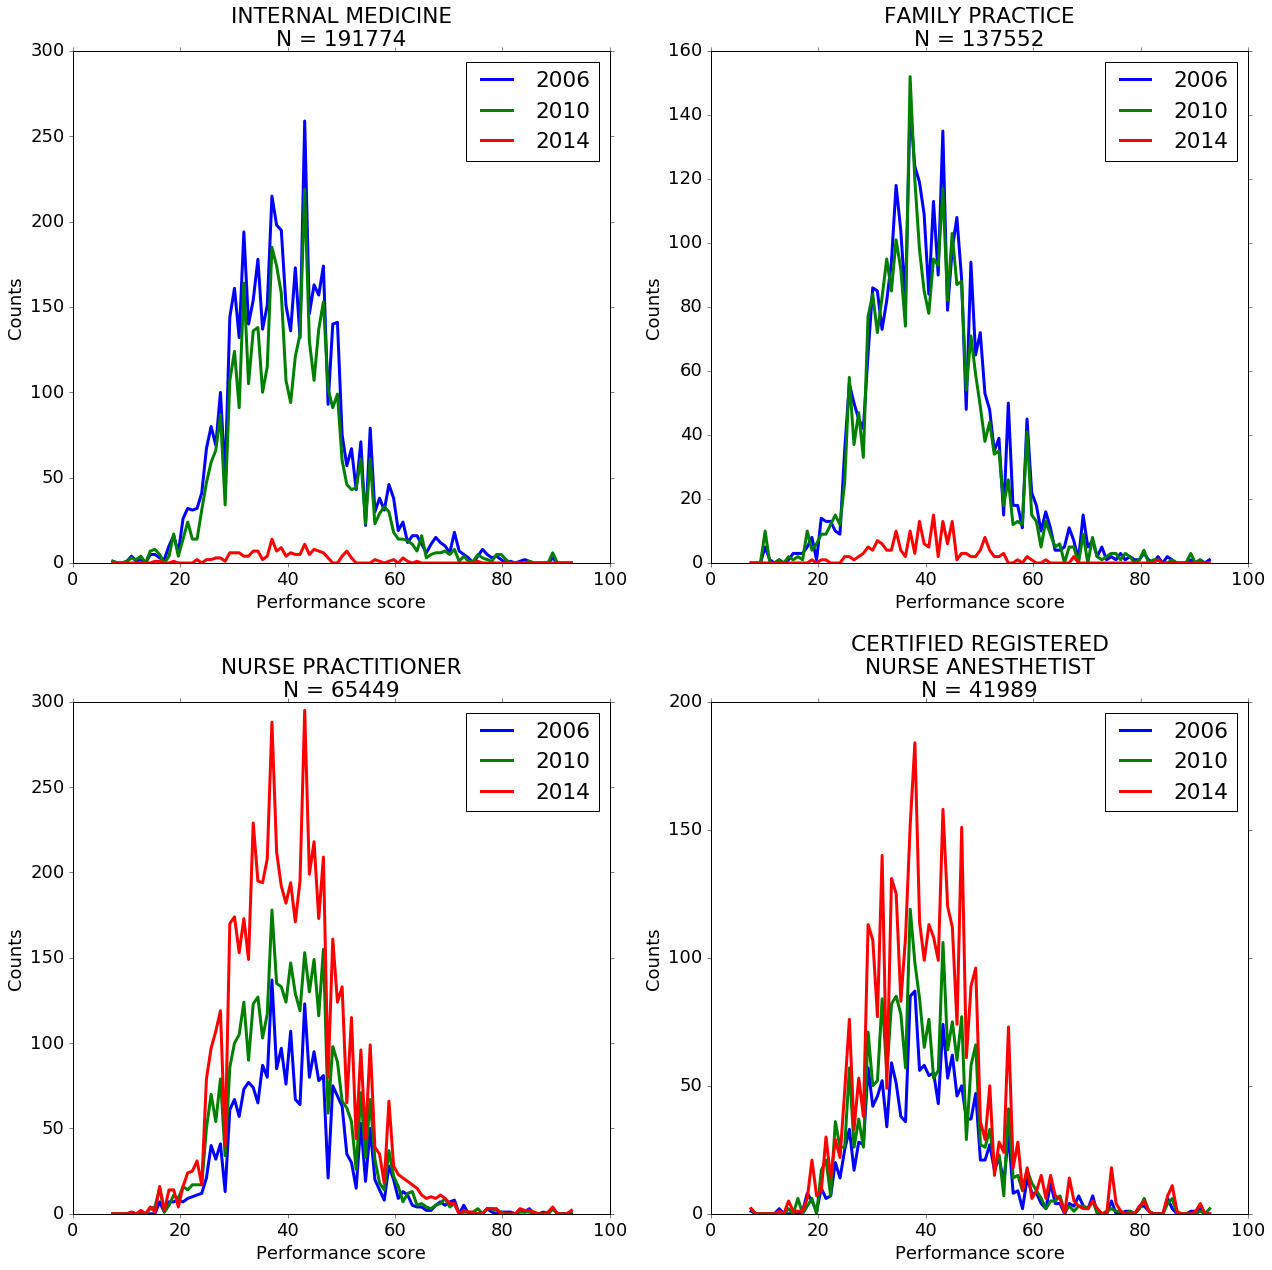

In [108]:
# OK, now I can generate a composite plot comparing all these.

# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for all hospitals

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data;

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            
            
            for col_number in [46, 50,  54]:
                new_x_axis = yedges
                new_x_axis = new_x_axis[1:]
    
                # Note: use col_number-1 here:
                # heatmap.transpose().shape is 99x54.
                # We can have xedges[54] == 2014 (which is the last edge we want to show).
                # But this corresponds to heatmap.transpose()[:, 53]
                new_y_axis = heatmap.transpose()[:, col_number - 1]
                # this_label = 'Graduation Year = ' + str(int(xedges[col_number]))
                this_label = str(int(xedges[col_number]))
                plt.plot(new_x_axis, new_y_axis, label=this_label, linewidth=3)
                plt.xlabel('Performance score')
                plt.ylabel('Counts')
                # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.legend()
    
            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('recent_graduate_trends_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


In [109]:
# Now let me compare some statistics: how many people practice at hospitals above the mean performance score, and how
# many below the mean performance score.

# First, what is the mean performance score?
data['Total Performance Score'].mean()

39.65652340349148

In [110]:
mean_total_performance_score = data['Total Performance Score'].mean()
mean_total_performance_score

39.65652340349148

In [111]:
median_total_performance_score = data['Total Performance Score'].median()
median_total_performance_score

38.8273

In [112]:
skewness_total_performance_score = data['Total Performance Score'].skew()
skewness_total_performance_score

0.65069413187099645

In [113]:
kurtosis_total_performance_score = data['Total Performance Score'].kurt()
kurtosis_total_performance_score

1.4225297335504137

NURSE PRACTITIONER


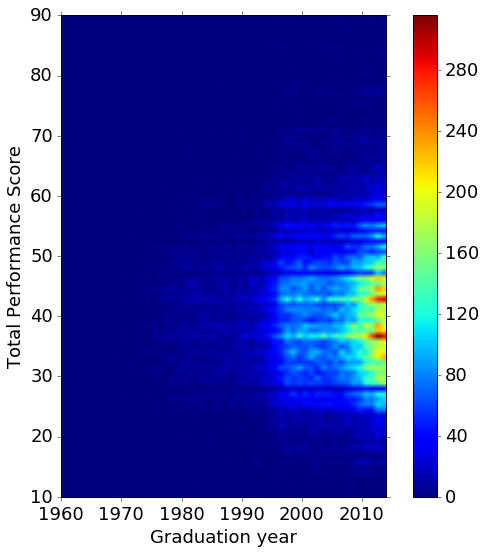

In [114]:
# Let me go back to my plot for nurses only

# Regenerate heatmap with 100 bins only for nurse practitioner

# also use specific bin edges.
# http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html

# 9/19/16
# I'd like to show stacked plots for graduation year on x axis and ratings on y axis.
# So this will be a vertical slice through one of the heatmaps above.


# This is for all hospitals

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['NURSE PRACTITIONER'];


plt.clf()
plt.figure(figsize=(8,8))


# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores

            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))
            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.imshow(heatmap.transpose(), extent=extent, origin='low')
            #plt.plot(x,y)
            plt.axis([1960, 2014, 10, 90])
            plt.xlabel('Graduation year')
            plt.ylabel('Total Performance Score')
            plt.colorbar()
 
plt.tight_layout()
# plt.savefig('specialties_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()


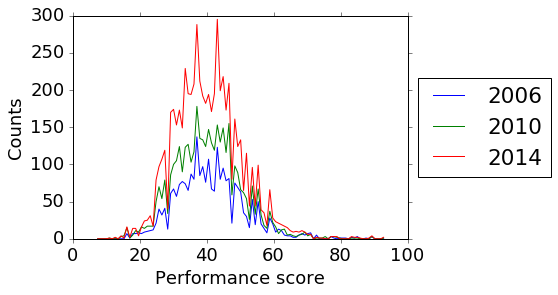

In [115]:
# There are too many in the plot above. So use a fewer number:

# Plot multiple curves for different graduation years.
for col_number in [46, 50,  54]:
    new_x_axis = yedges
    new_x_axis = new_x_axis[1:]
    
    # Note: use col_number-1 here:
    # heatmap.transpose().shape is 99x54.
    # We can have xedges[54] == 2014 (which is the last edge we want to show).
    # But this corresponds to heatmap.transpose()[:, 53]
    new_y_axis = heatmap.transpose()[:, col_number - 1]
    # this_label = 'Graduation Year = ' + str(int(xedges[col_number]))
    this_label = str(int(xedges[col_number]))
    plt.plot(new_x_axis, new_y_axis, label=this_label)
    plt.xlabel('Performance score')
    plt.ylabel('Counts')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
    

In [116]:
#So, for each curve I want to find out the total number of practitioners less than the mean, and the total above the mean.
new_x_axis

array([  7.47128384,   8.34256768,   9.21385152,  10.08513535,
        10.95641919,  11.82770303,  12.69898687,  13.57027071,
        14.44155455,  15.31283838,  16.18412222,  17.05540606,
        17.9266899 ,  18.79797374,  19.66925758,  20.54054141,
        21.41182525,  22.28310909,  23.15439293,  24.02567677,
        24.89696061,  25.76824444,  26.63952828,  27.51081212,
        28.38209596,  29.2533798 ,  30.12466364,  30.99594747,
        31.86723131,  32.73851515,  33.60979899,  34.48108283,
        35.35236667,  36.22365051,  37.09493434,  37.96621818,
        38.83750202,  39.70878586,  40.5800697 ,  41.45135354,
        42.32263737,  43.19392121,  44.06520505,  44.93648889,
        45.80777273,  46.67905657,  47.5503404 ,  48.42162424,
        49.29290808,  50.16419192,  51.03547576,  51.9067596 ,
        52.77804343,  53.64932727,  54.52061111,  55.39189495,
        56.26317879,  57.13446263,  58.00574646,  58.8770303 ,
        59.74831414,  60.61959798,  61.49088182,  62.36

In [117]:
new_x_axis[37]

39.708785858585863

In [118]:
# So we want the counts for bins 0:36 and bins 38:onwards
new_y_axis

array([   0.,    0.,    0.,    0.,    1.,    0.,    2.,    0.,    4.,
          1.,   16.,    2.,   14.,   14.,    4.,   16.,   24.,   25.,
         31.,   17.,   79.,   97.,  107.,  119.,   40.,  170.,  174.,
        153.,  173.,  149.,  229.,  195.,  194.,  208.,  288.,  212.,
        192.,  182.,  194.,  171.,  195.,  295.,  199.,  218.,  173.,
        209.,   80.,  161.,  124.,  133.,   65.,  115.,   44.,   96.,
         44.,   99.,   39.,   35.,   18.,   66.,   28.,   23.,   21.,
         19.,   17.,   15.,   11.,    9.,   10.,    9.,   11.,    9.,
          6.,    6.,    0.,    2.,    1.,    1.,    0.,    0.,    3.,
          3.,    3.,    0.,    0.,    0.,    0.,    3.,    2.,    2.,
          1.,    0.,    0.,    1.,    4.,    0.,    0.,    0.,    2.])

In [119]:
new_y_axis[0:36].sum()

2758.0

In [120]:
new_y_axis[37:].sum()

3177.0

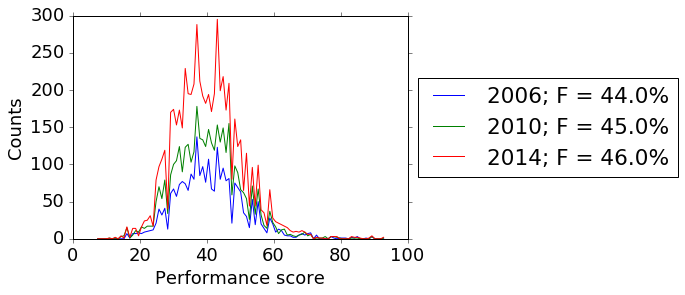

In [121]:
# OK. So I need to compute these and put it in some sort of table.

# There are too many in the plot above. So use a fewer number:

# Plot multiple curves for different graduation years.
for col_number in [46, 50,  54]:
    new_x_axis = yedges
    new_x_axis = new_x_axis[1:]
    
    # Note: use col_number-1 here:
    # heatmap.transpose().shape is 99x54.
    # We can have xedges[54] == 2014 (which is the last edge we want to show).
    # But this corresponds to heatmap.transpose()[:, 53]
    new_y_axis = heatmap.transpose()[:, col_number - 1] 
    
    sum_practitioners_less_than_mean = new_y_axis[0:36].sum()
    sum_practitioners_more_than_mean = new_y_axis[37:].sum()
    
    fraction_in_lower_hospitals =  sum_practitioners_less_than_mean/( sum_practitioners_less_than_mean +  
                                                                     sum_practitioners_more_than_mean)
    percentage_in_lower_hospitals = fraction_in_lower_hospitals*100
    
    # this_label = 'Graduation Year = ' + str(int(xedges[col_number])
    
    
    this_label = str(int(xedges[col_number])) + '; F = ' + str(percentage_in_lower_hospitals.round()) + '%'
    plt.plot(new_x_axis, new_y_axis, label=this_label)
    plt.xlabel('Performance score')
    plt.ylabel('Counts')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    

plt.show()


INTERNAL MEDICINE
FAMILY PRACTICE
NURSE PRACTITIONER
CERTIFIED REGISTERED NURSE ANESTHETIST


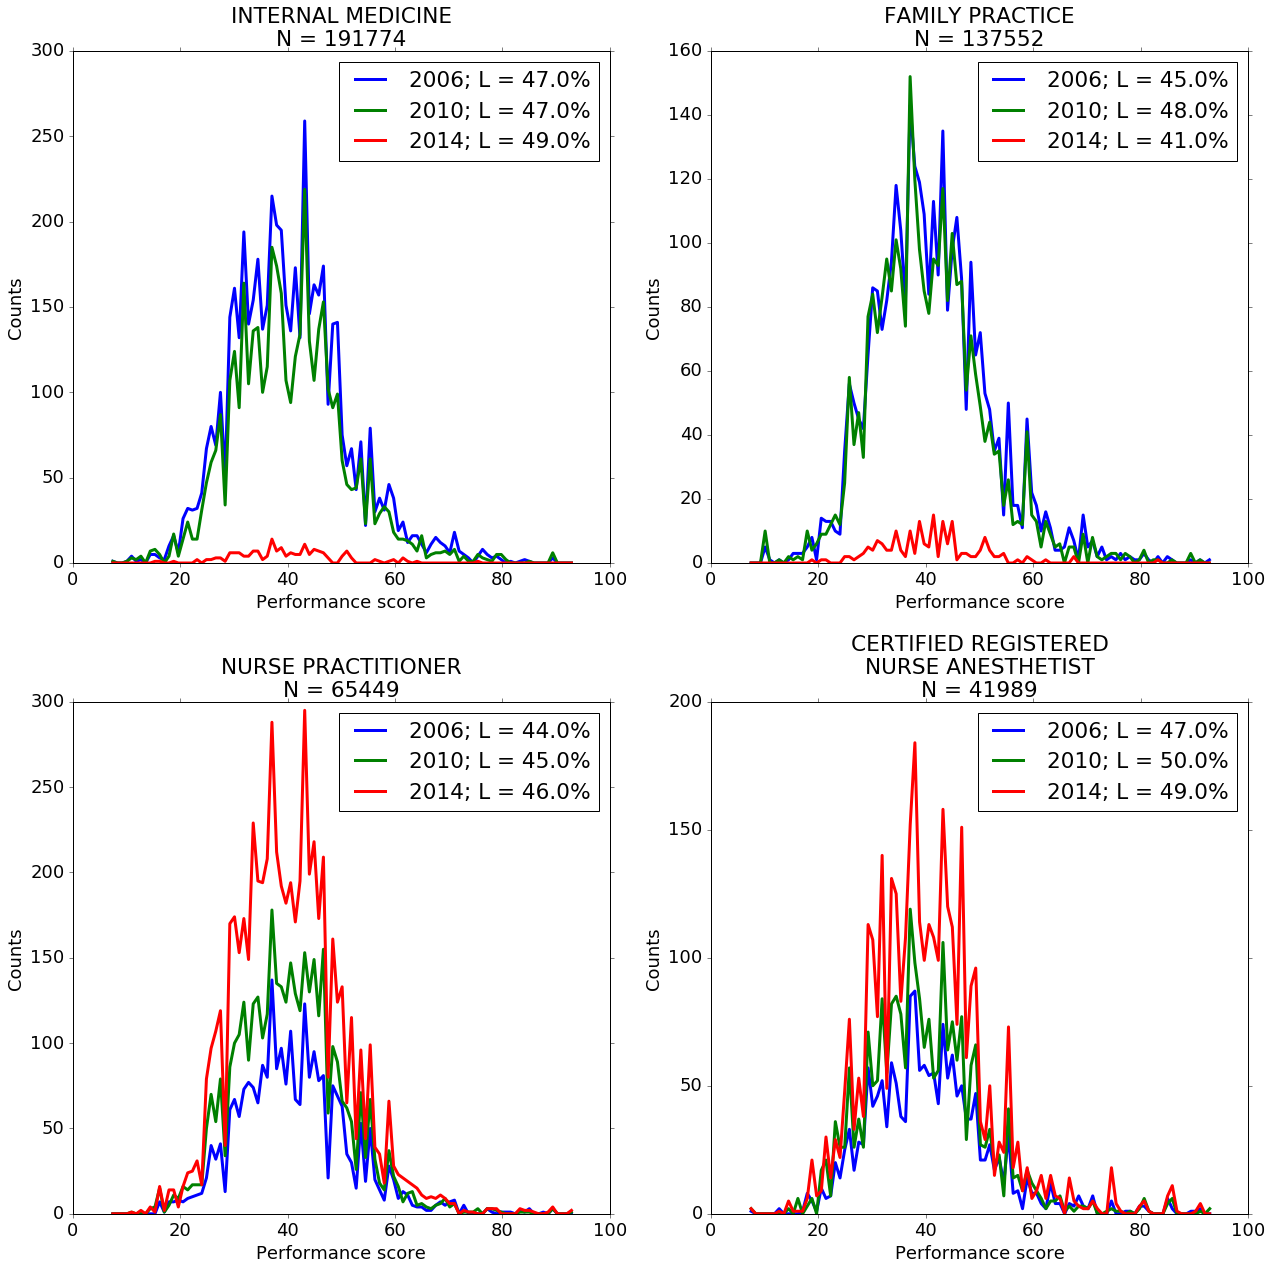

In [122]:
# OK, now I can generate a composite plot comparing all these.

# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for all hospitals

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data;

# We want these specialties plotted in exactly this order.
target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            
            
            for col_number in [46, 50,  54]:
                new_x_axis = yedges
                new_x_axis = new_x_axis[1:]
    
                # Note: use col_number-1 here:
                # heatmap.transpose().shape is 99x54.
                # We can have xedges[54] == 2014 (which is the last edge we want to show).
                # But this corresponds to heatmap.transpose()[:, 53]
                new_y_axis = heatmap.transpose()[:, col_number - 1]
        
                sum_practitioners_less_than_mean = new_y_axis[0:36].sum()
                sum_practitioners_more_than_mean = new_y_axis[37:].sum()
    
                fraction_in_lower_hospitals =  sum_practitioners_less_than_mean/( sum_practitioners_less_than_mean +  
                                                                     sum_practitioners_more_than_mean)
                percentage_in_lower_hospitals = fraction_in_lower_hospitals*100
    
                # this_label = 'Graduation Year = ' + str(int(xedges[col_number])  
                this_label = str(int(xedges[col_number])) + '; L = ' + str(percentage_in_lower_hospitals.round()) + '%'
                
                plt.plot(new_x_axis, new_y_axis, label=this_label, linewidth=3)
                plt.xlabel('Performance score')
                plt.ylabel('Counts')
                # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.legend()
    
            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
plt.savefig('recent_graduate_trends_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()

PSYCHIATRY
SPORTS MEDICINE
SLEEP LABORATORY/MEDICINE
GERIATRIC MEDICINE


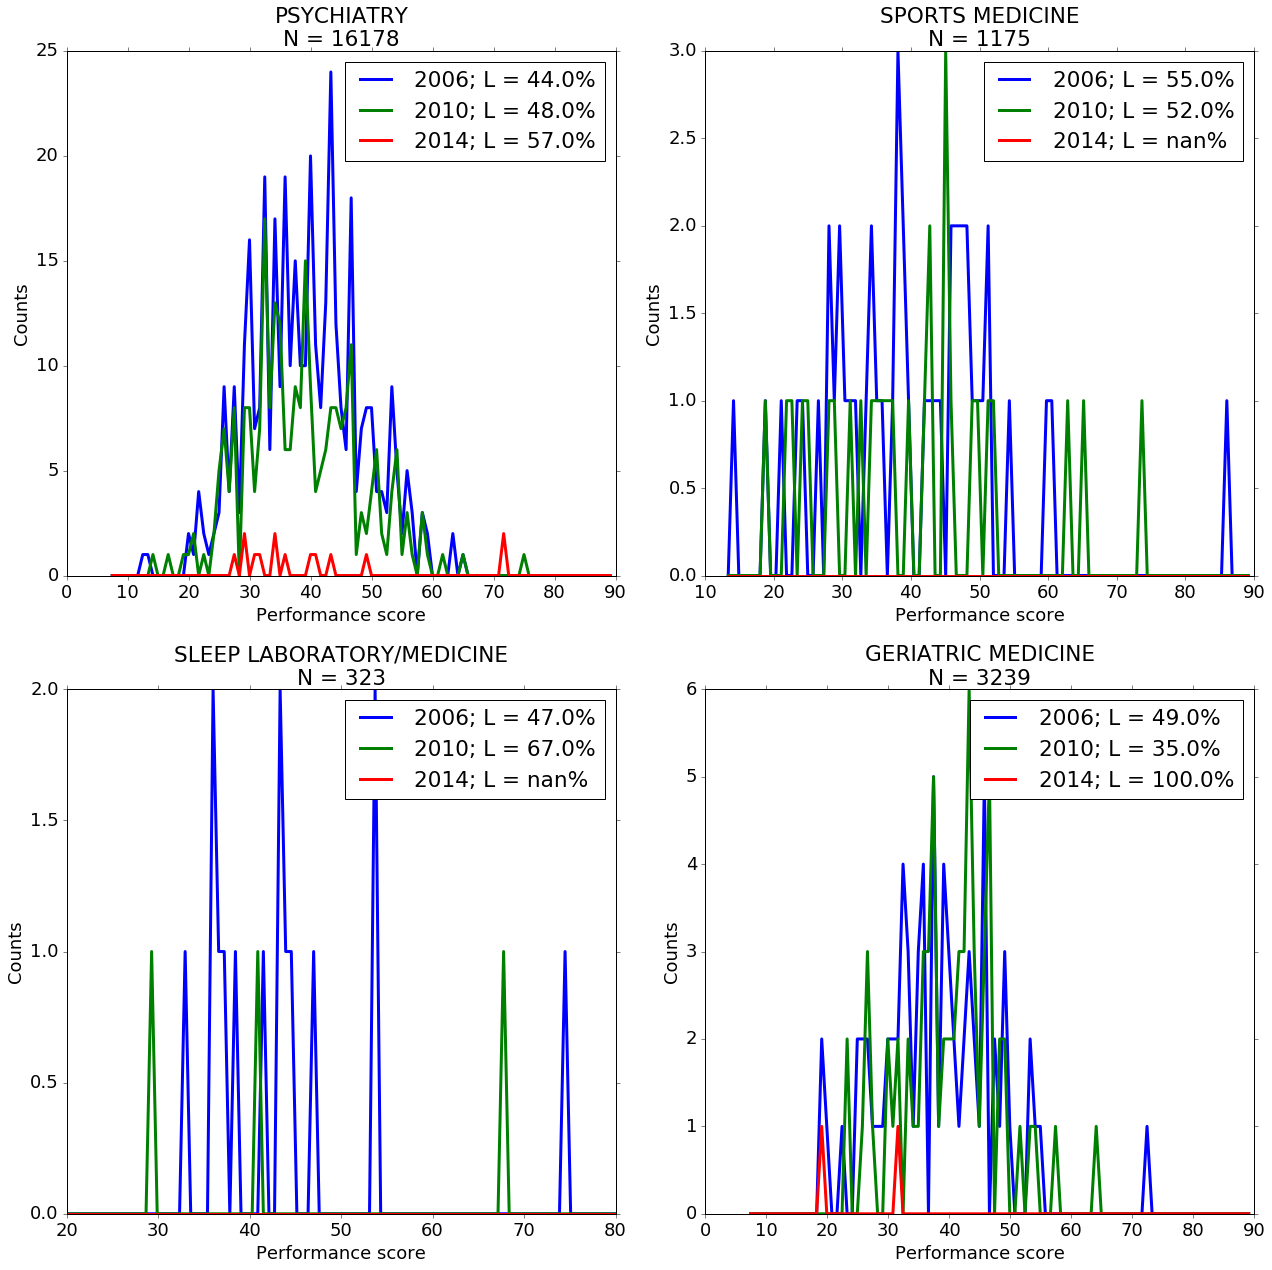

In [123]:
# I'm curious about some disciplines like psychiatry.

# OK, now I can generate a composite plot comparing all these.

# Since the above plot looks much smoother than the earlier ones I generated (before 9/19/16), 
# I will re-generate the plots. I need to use different bins, as shown above.

# 9/16/16

# This is for all hospitals

# Note, the above may not show the plots in the right order.
# So I changed the code to the following:

# This chunk of code written 9/15/16, Thursday afternoon meeting with Daniel.


# Note: we would like the ordering to be the following
# subplot_labels=iter(['a', 'b', 'c', 'd'])
# But these get placed as:
#       d  b
#       a  c
# So change the label ordering to:
# subplot_labels=iter(['(c)', '(b)', '(d)', '(a)'])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
subplot_labels=iter(['(a)', '(b)', '(c)', '(d)'])

# a subplot number like 221 means: 2x2 grid and this is the first plot (#1)
# Note: we would like the ordering to be the following
# sps=iter([221, 222, 223, 224])
# But these get placed as:
#       224  222
#       221  223
# So change the label ordering to:
# sps=iter([223, 222, 224, 221])
# STRANGE: it reverted back to the order I expected! So keep the original ordering now.
sps=iter([221, 222, 223, 224])

plt.clf()
plt.figure(figsize=(18,18))

df = data;

# We want these specialties plotted in exactly this order.
# target_specialty = ['INTERNAL MEDICINE', 'FAMILY PRACTICE', 'NURSE PRACTITIONER', 'CERTIFIED REGISTERED NURSE ANESTHETIST'];
target_specialty = ['PSYCHIATRY', 'SPORTS MEDICINE', 'SLEEP LABORATORY/MEDICINE', 'GERIATRIC MEDICINE'];

# I could probably write a more efficient loop, but this is OK for now. come back to this later, after 9/16/16

for specialty in target_specialty:
    for group_specialty, ind in df.groupby('Primary specialty').groups.items():
        if group_specialty == specialty:
 
            print(specialty)
            year = df.ix[ind, 'Graduation year']
            years = np.array(year)[:, np.newaxis]
            scores = df.ix[ind, 'Total Performance Score']
            # plt.plot(years, scores, 'bo')
            length = len(year)
            x = year
            y = scores
            
            my_bins_1_years_x_edges = np.arange(1960, 2015, 1);
            # use 100 bins here.
            my_bins_y_edges = np.linspace(min(y), max(y), 100)
            
            # heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
            # http://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram2d.html
            heatmap, xedges, yedges = np.histogram2d(x, y, bins=(my_bins_1_years_x_edges, my_bins_y_edges))

            extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

            plt.subplot(next(sps))
            
            
            for col_number in [46, 50,  54]:
                new_x_axis = yedges
                new_x_axis = new_x_axis[1:]
    
                # Note: use col_number-1 here:
                # heatmap.transpose().shape is 99x54.
                # We can have xedges[54] == 2014 (which is the last edge we want to show).
                # But this corresponds to heatmap.transpose()[:, 53]
                new_y_axis = heatmap.transpose()[:, col_number - 1]
        
                sum_practitioners_less_than_mean = new_y_axis[0:36].sum()
                sum_practitioners_more_than_mean = new_y_axis[37:].sum()
    
                fraction_in_lower_hospitals =  sum_practitioners_less_than_mean/( sum_practitioners_less_than_mean +  
                                                                     sum_practitioners_more_than_mean)
                percentage_in_lower_hospitals = fraction_in_lower_hospitals*100
    
                # this_label = 'Graduation Year = ' + str(int(xedges[col_number])  
                this_label = str(int(xedges[col_number])) + '; L = ' + str(percentage_in_lower_hospitals.round()) + '%'
                
                plt.plot(new_x_axis, new_y_axis, label=this_label, linewidth=3)
                plt.xlabel('Performance score')
                plt.ylabel('Counts')
                # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.legend()
    
            # The following code splits a longer specialty name into multiple lines,
            # with two words per line.
            # plt.title('%s, N = %d', specialty, length)
            s = iter(specialty.split())
            title = ''
            try:
                while True:
                    title += next(s) + ' '
                    title += next(s) + '\n'
            except:
                pass
            title = title.strip() + '\nN = %d' % (length)
            plt.title(title)
            #plt.show()

plt.tight_layout()
# plt.savefig('recent_graduate_trends_for_all_hospitals.png', bbox_inches='tight', dpi=300)


plt.show()

In [124]:
# Nothing really significant in the above.